# PART-4 `( Analysis: Some Questions )`

In [1]:
# %pip install pingouin

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import numpy as np
from scipy import stats
from tqdm import tqdm
import pingouin as pg
from colorama import Fore, Style
from scipy.stats import spearmanr



tqdm.pandas()

In [3]:
# pd.options.mode.dtype_backend = 'pyarrow'
plt.rcParams["figure.figsize"] = (10, 6)
pd.options.display.max_columns = 100
# pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
sns.set_style("whitegrid")

In [4]:
pd.__version__

'2.0.0rc1'

In [5]:
df = pd.read_csv('3_outliers_handled.csv')
# df = pd.read_csv('filled.csv')

In [6]:
df

,make_model,make,model,price,body_type,age,fuel,country,type,warranty,mileage,gearbox,seller,engine_size,gears,co2_emissions,drivetrain,cylinders,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,power_hp,fuel_consumption_avg,address,latitude,longitude,cc,ss,em
0,Mercedes-Benz A 160,Mercedes-Benz,A 160,16950.00,Compact,6.00,Diesel,Spain,Used,Yes,120200.00,Manual,Dealer,1461.00,5.00,126.00,Front,4.00,Alloy wheels,1295.00,No,Cloth,2.00,efficient,90.00,5.45,"Calle Forja 6, 11500 El Puerto de Santa María,...",36.62,-6.21,premium,Safety Security Premium,Entertainment Media Standard
1,Mercedes-Benz EQE 350,Mercedes-Benz,EQE 350,80900.00,Compact,0.00,Electric,Spain,Pre-registered,Yes,5000.00,Automatic,Dealer,1.00,1.00,0.00,4WD,0.00,"Alloy wheels (21""), Shift paddles, Sport packa...",2355.00,No,Part/Full Leather,1.00,efficient,292.00,2.36,"Calle Logroño, 28649 Rozas de Puerto Real, Mad...",40.32,-4.47,premium_plus,Safety Security Premium Plus,Entertainment Media Premium
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,69900.00,Compact,2.00,Benzine,Spain,Used,Yes,18900.00,Automatic,Dealer,1991.00,8.00,162.00,4WD,4.00,Alloy wheels,1555.00,No,Part/Full Leather,2.00,inefficient,421.00,8.40,"Muelle de Llevant, 43004 Tarragona, Spain",41.11,1.25,premium,Safety Security Standard,Entertainment Media Standard
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,A 35 AMG,46990.00,Compact,2.00,Benzine,Spain,Used,Yes,18995.00,Automatic,Dealer,1991.00,7.00,169.00,4WD,4.00,Sport seats,1455.00,No,Part/Full Leather,2.00,inefficient,306.00,7.30,"Calle Provenza, Valle de los Molinos, 45200 Gu...",20.85,-103.43,premium,Safety Security Standard,Entertainment Media Standard
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,16800.00,Compact,7.00,Diesel,Spain,Used,Yes,197000.00,Automatic,Dealer,2143.00,7.00,162.00,4WD,4.00,Alloy wheels,1545.00,No,Part/Full Leather,2.00,inefficient,136.00,4.90,"Carril de los Aragonés 4, 30007 Murcia, Spain",38.01,-1.09,premium,Safety Security Premium,Entertainment Media Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24802,Volvo S90,Volvo,S90,37600.00,Sedan,3.00,Electric,Spain,Used,Yes,40345.00,Automatic,Dealer,1969.00,8.00,0.00,4WD,0.00,Alloy wheels,2077.00,No,Part/Full Leather,2.00,efficient,392.00,2.00,"Calle de los Hermanos Lumière 16, 29004 Málaga...",36.69,-4.46,premium,Safety Security Standard,Entertainment Media Standard
24803,Volvo S40,Volvo,S40,5499.00,Sedan,18.00,Benzine,Netherlands,Used,No,145000.00,Automatic,Dealer,2435.00,5.00,217.00,Front,5.00,"Alloy wheels (16""), Trailer hitch",1357.00,Yes,Part/Full Leather,3.00,efficient,170.00,9.10,"Stobbeweg 6, 2461 EX Ter Aar, Netherlands",52.18,4.71,premium,Safety Security Premium,Entertainment Media Standard
24804,Volvo C30,Volvo,C30,7300.00,Sedan,11.00,Diesel,Belgium,Used,Yes,96000.00,Manual,Dealer,1560.00,6.00,99.00,Front,4.00,"Alloy wheels, Automatically dimming interior m...",1356.00,Yes,Cloth,1.00,inefficient,114.00,3.80,"5060, Belgium",50.45,4.64,premium,Safety Security Premium,Entertainment Media Standard
24805,Volvo S90,Volvo,S90,29900.00,Sedan,5.00,Benzine,Netherlands,Used,Yes,94343.00,Automatic,Dealer,1969.00,8.00,149.00,Front,4.00,"Alloy wheels (18""), Automatically dimming inte...",1617.00,Yes,Part/Full Leather,1.00,efficient,254.00,6.50,"Bergambachterstraat 5, 2871 JB Schoonhoven, Ne...",51.96,4.85,premium,Safety Security Premium Plus,Entertainment Media Premium


### 1. What is the`` average`` ``Mileage`` of the vehicles according to their ``body types``?

In [7]:
avg_mileage = df.groupby(["make_model", "body_type"]).mileage.mean()
avg_mileage

make_model    body_type       
Dacia Break   Station wagon         999.00
Dacia Dokker  Compact            141100.00
              Off-Road/Pick-up   100000.00
              Sedan              149000.00
              Station wagon       74782.85
                                    ...   
Volvo XC70    Station wagon      188162.92
Volvo XC90    Coupe               81250.00
              Off-Road/Pick-up    82271.21
              Sedan               58761.33
              Station wagon      146775.00
Name: mileage, Length: 1038, dtype: float64

In [8]:
avg_mileage_body = df.groupby("body_type").mileage.mean()
avg_mileage_body

body_type
Compact            67522.00
Convertible        97344.42
Coupe              86892.09
Off-Road/Pick-up   50346.49
Sedan              51684.14
Station wagon      73655.93
Name: mileage, dtype: float64

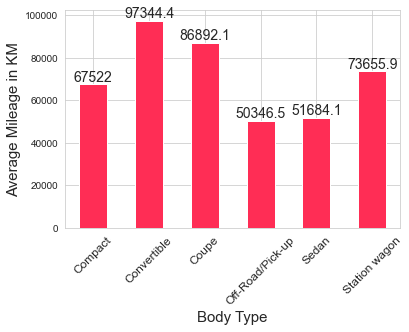

In [9]:
ax = avg_mileage_body.plot.bar(color='#ff2d55');
plt.bar_label(ax.containers[0], fontsize=14);
plt.xticks(rotation=45,fontsize=12);
plt.xlabel('Body Type', fontsize=15)
plt.ylabel('Average Mileage in KM', fontsize=15);

### 2. What is the ``average`` ``price`` of the vehicles according to the ``gearbox`` they have?

In [10]:
avg_price = df.groupby(["make_model", "body_type"]).price.mean()
avg_price

make_model    body_type       
Dacia Break   Station wagon      20500.00
Dacia Dokker  Compact            11930.00
              Off-Road/Pick-up   12490.00
              Sedan               8900.00
              Station wagon      13344.12
                                   ...   
Volvo XC70    Station wagon      21161.92
Volvo XC90    Coupe              49900.00
              Off-Road/Pick-up   51848.59
              Sedan              60366.67
              Station wagon      32750.00
Name: price, Length: 1038, dtype: float64

In [11]:
avg_price = df.groupby(["make_model", "gearbox"]).price.mean()
avg_price

make_model    gearbox       
Dacia Break   Manual           20500.00
Dacia Dokker  Manual           13209.00
Dacia Duster  Automatic        18861.20
              Manual           16433.10
Dacia Jogger  Manual           23215.83
                                 ...   
Volvo XC70    Automatic        20925.36
              Manual           15950.00
Volvo XC90    Automatic        52700.58
              Manual            7199.50
              Semi-automatic   36000.00
Name: price, Length: 730, dtype: float64

In [12]:
avg_price_body = df.groupby("body_type").price.mean().sort_values(ascending=False)
avg_price_body

body_type
Coupe              30998.68
Off-Road/Pick-up   29324.97
Sedan              22550.23
Station wagon      22282.63
Convertible        21099.55
Compact            15985.41
Name: price, dtype: float64

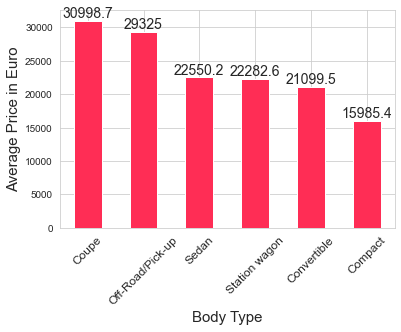

In [13]:
ax = avg_price_body.plot.bar(color='#ff2d55');
plt.bar_label(ax.containers[0], fontsize=14);
plt.xticks(rotation=45,fontsize=12);
plt.xlabel('Body Type', fontsize=15)
plt.ylabel('Average Price in Euro', fontsize=15);

In [14]:
avg_price_make = df.groupby("make").price.mean().sort_values(ascending=False)
avg_price_make

make
Mercedes-Benz   51908.80
Ford            31015.42
Volvo           27543.10
Skoda           23445.81
Toyota          22830.43
Nissan          21334.26
Hyundai         19663.11
Seat            19334.23
Opel            17667.42
Renault         16983.25
Peugeot         16794.73
Fiat            15686.71
Dacia           13331.82
Name: price, dtype: float64

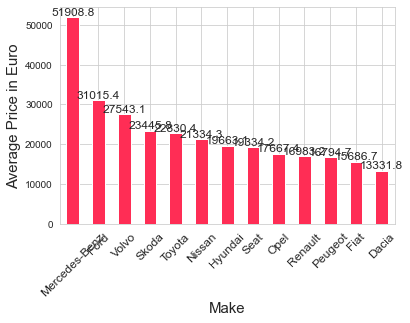

In [15]:
ax = avg_price_make.plot.bar(color='#ff2d55');
plt.bar_label(ax.containers[0], fontsize=12);
plt.xticks(rotation=45,fontsize=12);
plt.xlabel('Make', fontsize=15)
plt.ylabel('Average Price in Euro', fontsize=15);

In [16]:
avg_price_gearbox = df.groupby("gearbox").price.mean().sort_values(ascending=False)
avg_price_gearbox

gearbox
Automatic        35042.72
Semi-automatic   32802.35
Manual           15534.29
Name: price, dtype: float64

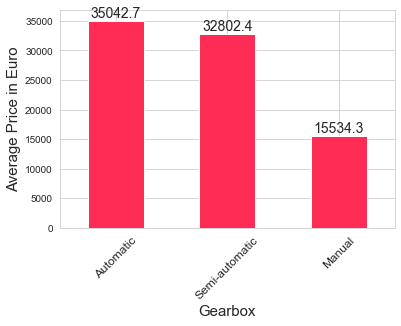

In [17]:
ax = avg_price_gearbox.plot.bar(color='#ff2d55');
plt.bar_label(ax.containers[0], fontsize=14);
plt.xticks(rotation=45,fontsize=12);
plt.xlabel('Gearbox', fontsize=15)
plt.ylabel('Average Price in Euro', fontsize=15);

### 3. What is the ``average`` ``price`` of the vehicles according to the ``fuel types`` they use?

In [18]:
avg_price = df.groupby(["make_model", "fuel"]).price.mean().sort_values(ascending=False)
avg_price

make_model              fuel    
Ford GT                 Benzine    763225.00
Mercedes-Benz SLS       Benzine    234450.00
Mercedes-Benz AMG GT    Electric   224885.00
Mercedes-Benz G 63 AMG  Benzine    220918.20
Mercedes-Benz G 400     Diesel     173349.75
                                      ...   
Nissan Almera Tino      Diesel       1500.00
Hyundai Matrix          Benzine      1250.00
Toyota Celica           LPG/CNG      1200.00
Opel Agila              Benzine       999.00
Peugeot 106             Benzine       950.00
Name: price, Length: 829, dtype: float64

In [19]:
avg_price_fuel = df.groupby(["body_type", "fuel"]).price.mean().sort_values(ascending=False)
avg_price_fuel

body_type         fuel    
Off-Road/Pick-up  Hydrogen   68966.40
Coupe             Ethanol    48850.00
Off-Road/Pick-up  Electric   41260.72
Sedan             Electric   38993.35
                  Hydrogen   38901.12
Coupe             Electric   35528.09
                  Benzine    33681.70
Station wagon     Electric   33314.41
Off-Road/Pick-up  Benzine    28891.47
Convertible       Electric   27953.87
Off-Road/Pick-up  Diesel     27525.41
Compact           Electric   23071.72
Station wagon     Benzine    22921.25
Convertible       Benzine    22637.74
Sedan             Benzine    21138.78
Station wagon     Diesel     20555.74
Sedan             Diesel     19841.68
Off-Road/Pick-up  LPG/CNG    17856.41
Coupe             Diesel     17828.75
Compact           Benzine    15711.26
Sedan             LPG/CNG    14551.65
Station wagon     LPG/CNG    14398.80
Compact           Diesel     14309.12
Convertible       Diesel     13103.04
Compact           LPG/CNG    12833.72
Convertible       LPG/C

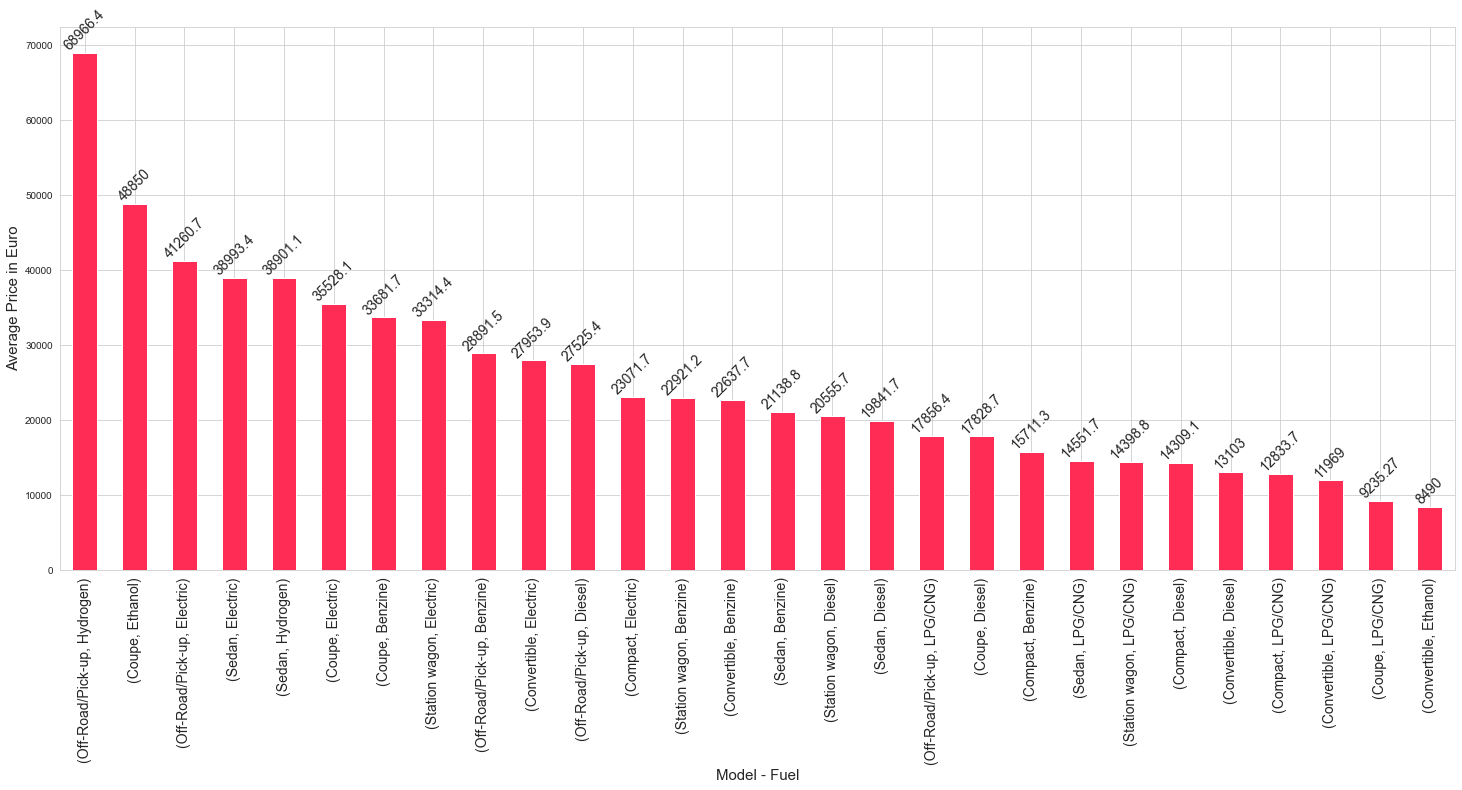

In [20]:
ax = avg_price_fuel.plot.bar(figsize = (25,10),color='#ff2d55');
plt.bar_label(ax.containers[0], fontsize=14, rotation = 45);
plt.xticks(rotation=90,fontsize=14);
plt.xlabel('Model - Fuel', fontsize=15)
plt.ylabel('Average Price in Euro', fontsize=15);

In [21]:
avg_price_fuel2 = df.groupby(["make", "fuel"]).price.mean().sort_values(ascending=False)
avg_price_fuel2

make           fuel    
Nissan         Ethanol    87900.00
Mercedes-Benz  Electric   77206.22
Hyundai        Hydrogen   68966.40
Mercedes-Benz  Benzine    57512.19
Volvo          Electric   52021.57
Skoda          Electric   44737.86
Toyota         Hydrogen   38901.12
Mercedes-Benz  Diesel     38745.28
Peugeot        Electric   37348.05
Ford           Electric   35589.12
Opel           Electric   32864.34
Ford           Benzine    32464.27
               LPG/CNG    30630.00
Hyundai        Electric   29883.80
Seat           Electric   29216.56
Volvo          Benzine    29055.78
Toyota         Diesel     25126.78
Ford           Diesel     24739.63
Nissan         Electric   24719.75
Skoda          Diesel     24353.18
Toyota         Electric   23962.83
Nissan         Benzine    23838.33
Volvo          Diesel     23219.53
Fiat           Electric   23184.81
Renault        Electric   23174.02
Dacia          Electric   22159.49
Skoda          Benzine    22007.93
Toyota         Benzine    21668

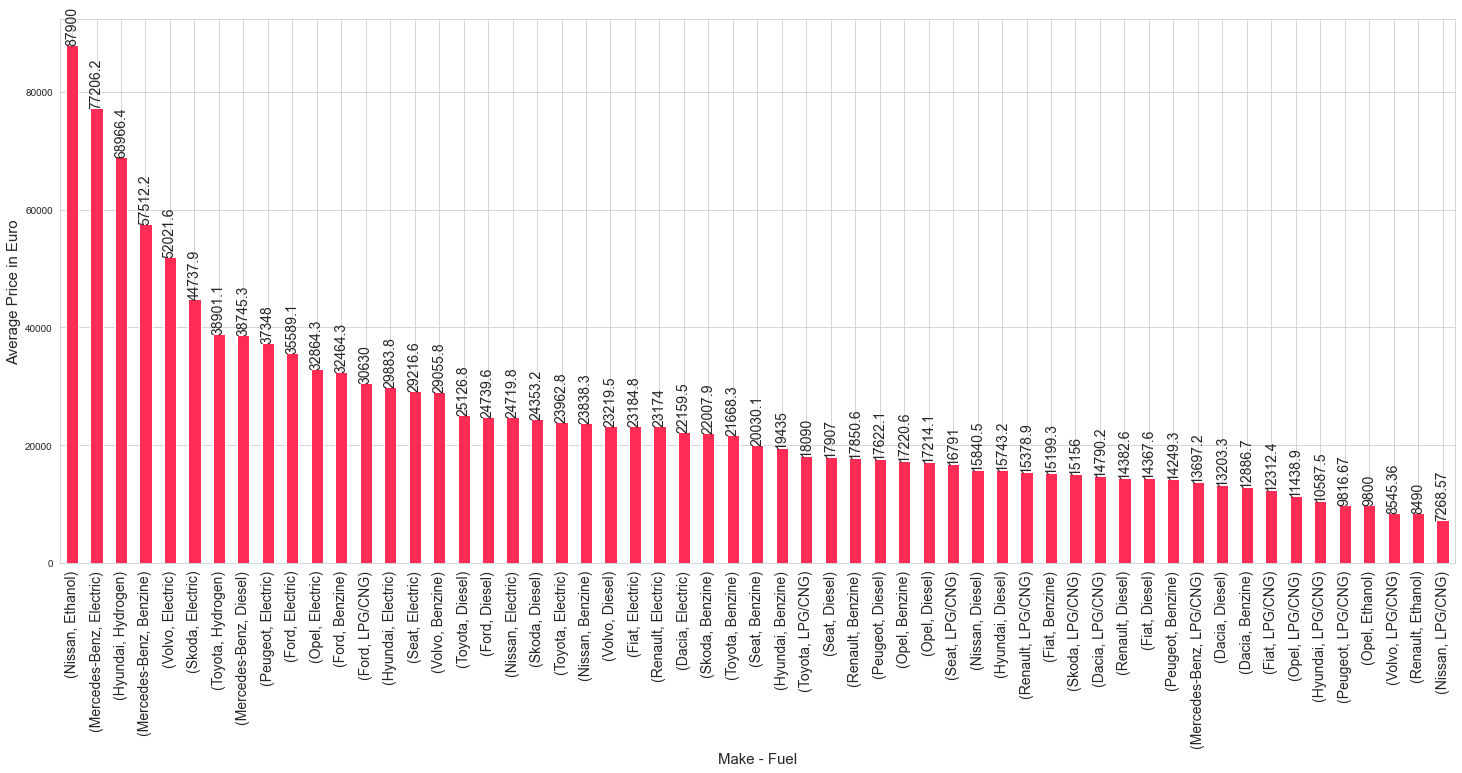

In [22]:
ax = avg_price_fuel2.plot.bar(figsize = (25,10),color='#ff2d55');
plt.bar_label(ax.containers[0], fontsize=14, rotation = 90);
plt.xticks(rotation=90,fontsize=14);
plt.xlabel('Make - Fuel', fontsize=15)
plt.ylabel('Average Price in Euro', fontsize=15);

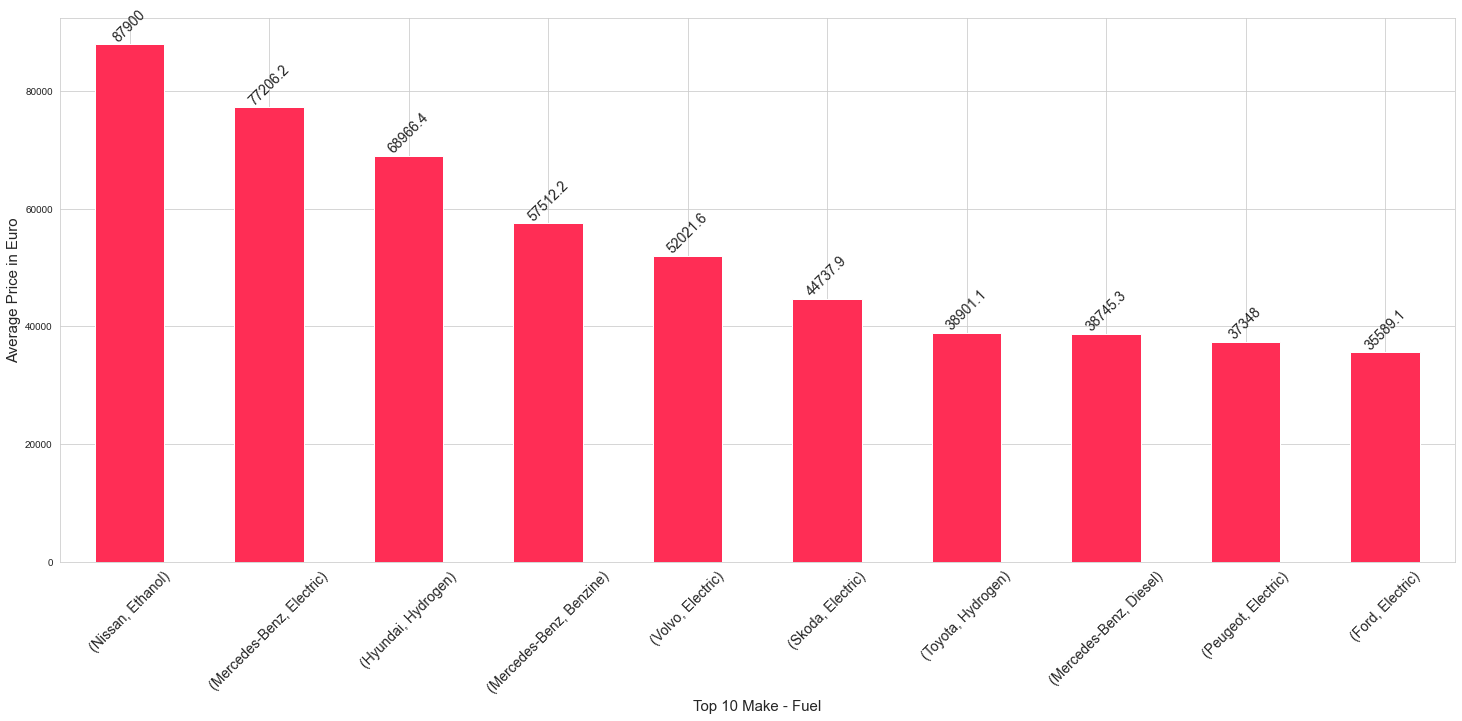

In [23]:
ax = avg_price_fuel2.head(10).plot.bar(figsize = (25,10),color='#ff2d55');
plt.bar_label(ax.containers[0], fontsize=14, rotation = 45);
plt.xticks(rotation=45,fontsize=14);
plt.xlabel('Top 10 Make - Fuel', fontsize=15)
plt.ylabel('Average Price in Euro', fontsize=15);

In [24]:
avg_price_fuel3 = df.loc[df.fuel == 'Electric'].groupby(["make", "fuel"]).price.mean().sort_values(ascending=False)
avg_price_fuel3

make           fuel    
Mercedes-Benz  Electric   77206.22
Volvo          Electric   52021.57
Skoda          Electric   44737.86
Peugeot        Electric   37348.05
Ford           Electric   35589.12
Opel           Electric   32864.34
Hyundai        Electric   29883.80
Seat           Electric   29216.56
Nissan         Electric   24719.75
Toyota         Electric   23962.83
Fiat           Electric   23184.81
Renault        Electric   23174.02
Dacia          Electric   22159.49
Name: price, dtype: float64

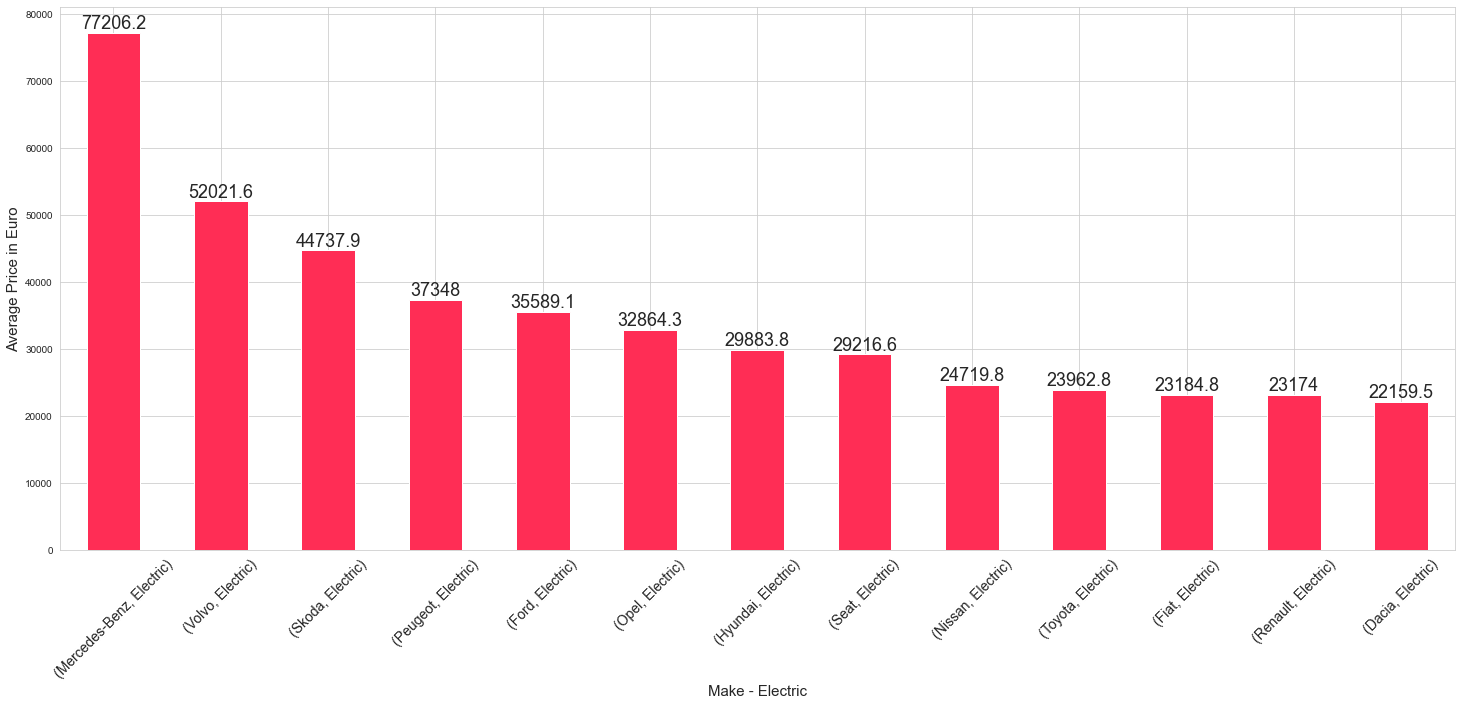

In [25]:
ax = avg_price_fuel3.plot.bar(figsize = (25,10),color='#ff2d55');
plt.bar_label(ax.containers[0], fontsize=18, rotation = 0);
plt.xticks(rotation=45,fontsize=14);
plt.xlabel('Make - Electric', fontsize=15)
plt.ylabel('Average Price in Euro', fontsize=15);

In [26]:
avg_price_fuel4 = df.loc[df.fuel == 'Benzine'].groupby(["make", "fuel"]).price.mean().sort_values(ascending=False)
avg_price_fuel4

make           fuel   
Mercedes-Benz  Benzine   57512.19
Ford           Benzine   32464.27
Volvo          Benzine   29055.78
Nissan         Benzine   23838.33
Skoda          Benzine   22007.93
Toyota         Benzine   21668.34
Seat           Benzine   20030.13
Hyundai        Benzine   19435.04
Renault        Benzine   17850.64
Opel           Benzine   17220.63
Fiat           Benzine   15199.31
Peugeot        Benzine   14249.30
Dacia          Benzine   12886.72
Name: price, dtype: float64

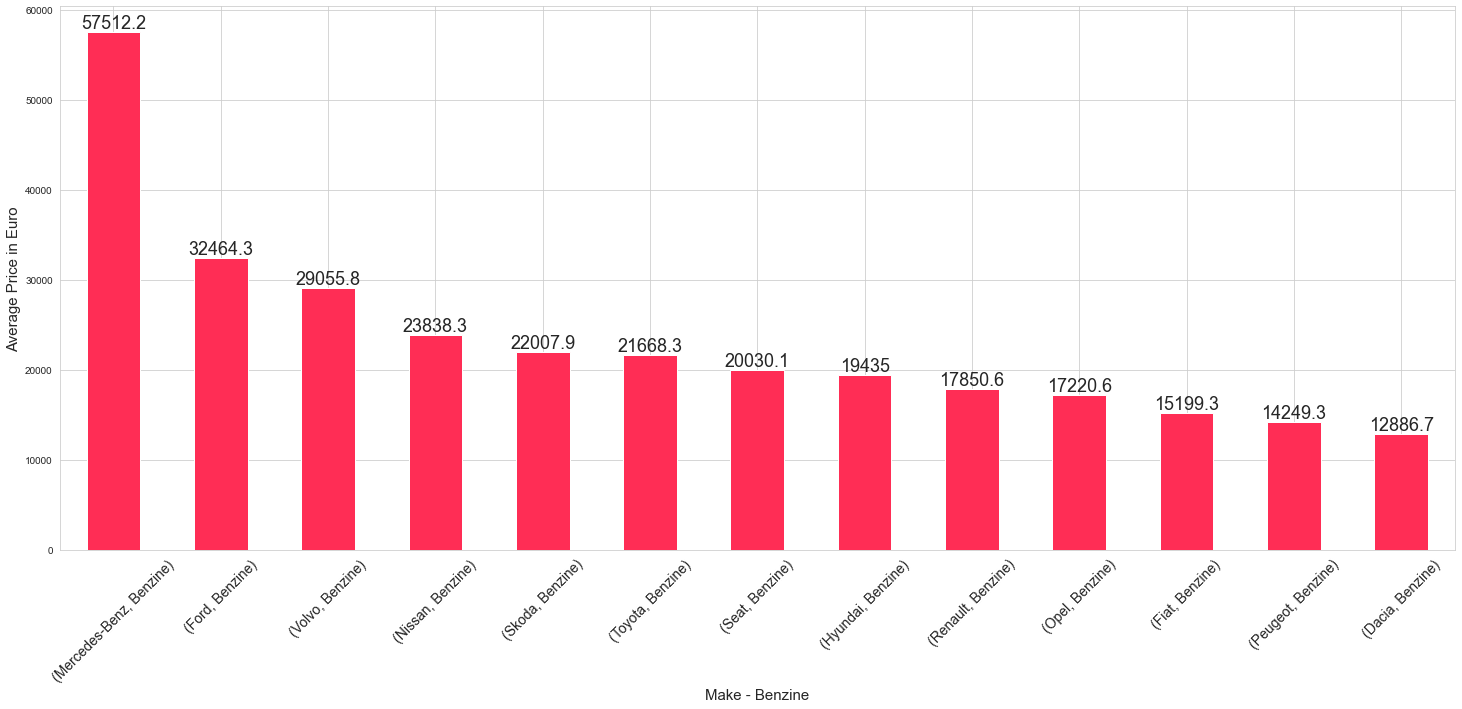

In [27]:
ax = avg_price_fuel4.plot.bar(figsize = (25,10),color='#ff2d55');
plt.bar_label(ax.containers[0], fontsize=18, rotation = 0);
plt.xticks(rotation=45,fontsize=14);
plt.xlabel('Make - Benzine', fontsize=15)
plt.ylabel('Average Price in Euro', fontsize=15);

### 4. Which ``make & model`` has the ``highest`` number of vehicles for sale?

In [28]:
num_sale = df["make_model"].value_counts()
num_sale_df = pd.DataFrame(num_sale).rename(columns={"count": "No of Sales"})
num_sale_df

,No of Sales
make_model,
Renault Megane,825
Seat Leon,757
Dacia Sandero,718
Hyundai i30,699
Opel Astra,634
...,...
Mercedes-Benz S 65 AMG,1
Mercedes-Benz CLK 320,1
Toyota GR86,1


In [29]:
# PARETO RULE

num_sale /= num_sale.sum()/100
category_classes = pd.qcut(num_sale, q=[0, .20, 0.80, 1.], 
                 labels=['Bottom 20%', 'Mid 60%', 'Top 20%'])
prob_groups = num_sale.groupby(category_classes).sum().sort_values(ascending=False)

display(prob_groups)
display(category_classes)

count
Top 20%      81.87
Mid 60%      17.42
Bottom 20%    0.71
Name: count, dtype: float64

make_model
Renault Megane               Top 20%
Seat Leon                    Top 20%
Dacia Sandero                Top 20%
Hyundai i30                  Top 20%
Opel Astra                   Top 20%
                             ...    
Mercedes-Benz S 65 AMG    Bottom 20%
Mercedes-Benz CLK 320     Bottom 20%
Toyota GR86               Bottom 20%
Toyota Tacoma             Bottom 20%
Renault R 11              Bottom 20%
Name: count, Length: 490, dtype: category
Categories (3, object): ['Bottom 20%' < 'Mid 60%' < 'Top 20%']

In [30]:
PARETO_category = pd.DataFrame(category_classes).rename(columns={0: "PARETO_category"})
PARETO_Rule = pd.merge(num_sale_df, PARETO_category, left_index=True, right_index=True).reset_index()\
                                            .rename(columns={"index": "make_model", "count": "Pareto_category"})

PARETO_Rule

,make_model,No of Sales,Pareto_category
0,Renault Megane,825,Top 20%
1,Seat Leon,757,Top 20%
2,Dacia Sandero,718,Top 20%
3,Hyundai i30,699,Top 20%
4,Opel Astra,634,Top 20%
...,...,...,...
485,Mercedes-Benz S 65 AMG,1,Bottom 20%
486,Mercedes-Benz CLK 320,1,Bottom 20%
487,Toyota GR86,1,Bottom 20%
488,Toyota Tacoma,1,Bottom 20%


In [31]:
top20 = PARETO_Rule[PARETO_Rule["Pareto_category"] == "Top 20%"]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96
make_model,Renault Megane,Seat Leon,Dacia Sandero,Hyundai i30,Opel Astra,Ford Mustang,Peugeot 308,Ford Focus,Nissan Qashqai,Seat Ibiza,Fiat Tipo,Fiat 500,Renault Clio,Volvo V40,Ford Fiesta,Nissan Micra,Fiat 500X,Skoda Octavia,Opel Corsa,Dacia Duster,Toyota Yaris,Opel Insignia,Volvo C70,Peugeot 208,Skoda Fabia,Fiat 500C,Toyota Auris,Peugeot RCZ,Hyundai Tucson,Peugeot 3008,Ford Kuga,Dacia Logan,Peugeot 508,Toyota Corolla,Volvo XC60,Skoda Superb,Skoda Scala,Seat Ateca,Seat Arona,Hyundai i20,Volvo V60,Renault Captur,Ford Mondeo,Nissan 370Z,Skoda Kodiaq,Toyota C-HR,Peugeot 207,Peugeot 2008,Skoda Karoq,Renault Talisman,Opel Grandland X,Renault Kadjar,Peugeot 206,Opel Cascada,Toyota Aygo,Volvo S60,Mercedes-Benz A 180,Nissan X-Trail,Nissan 350Z,Volvo C30,Opel Adam,Fiat Panda,Volvo S90,Nissan Pulsar,Toyota RAV 4,Volvo XC90,Volvo V90,Volvo XC40,Hyundai IONIQ,Nissan Juke,Hyundai i10,Peugeot 307,Fiat 124 Spider,Renault Twingo,Fiat 500L,Opel Crossland X,Renault ZOE,Renault Laguna,Mercedes-Benz A 200,Skoda Kamiq,Mercedes-Benz C 200,Toyota GT86,Mercedes-Benz C 220,Hyundai i40,Toyota Land Cruiser,Nissan GT-R,Peugeot 5008,Peugeot 407,Hyundai KONA,Toyota Avensis,Opel Mokka,Skoda Rapid/Spaceback,Dacia Lodgy,Mercedes-Benz A 45 AMG,Mercedes-Benz AMG GT,Peugeot 108,Renault Arkana
No of Sales,825,757,718,699,634,568,536,483,483,433,413,410,404,400,392,378,372,359,357,342,323,290,273,259,246,238,226,220,216,215,208,194,194,190,190,189,188,181,166,163,158,156,154,153,146,144,143,143,142,137,136,128,127,125,124,123,123,122,121,117,114,111,110,109,107,107,104,104,103,101,96,94,92,91,89,88,88,87,86,85,84,84,83,82,80,79,78,78,78,77,73,72,72,71,68,67,63
Pareto_category,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%,Top 20%


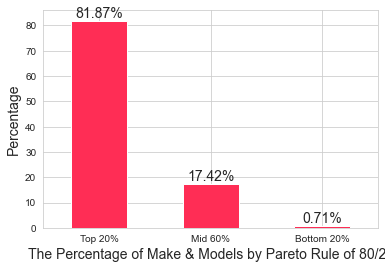

In [32]:
ax = prob_groups.plot(kind='bar',color='#ff2d55')

display(top20.T)

for container in ax.containers:
    ax.bar_label(container, fontsize=14, rotation=0, fmt='%.2f%%')
    
ax.set_xlabel('The Percentage of Make & Models by Pareto Rule of 80/20', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)

plt.xticks(rotation=0)
plt.show()

### 5. Which vehicle ``make & models`` has the ``lowest`` ``average`` ``fuel consumption`` ``by body_type`` and What are their ``fuel_types``?

In [33]:
fuel_cons_avg = df.groupby(["make_model", "body_type", "fuel"]).fuel_consumption_avg.min()
fuel_cons_avg

make_model    body_type         fuel    
Dacia Break   Station wagon     Benzine    5.10
Dacia Dokker  Compact           Diesel     4.20
              Off-Road/Pick-up  Benzine    6.30
                                LPG/CNG    6.30
              Sedan             Diesel     4.50
                                           ... 
Volvo XC90    Off-Road/Pick-up  Diesel     2.10
                                Electric   1.50
              Sedan             Diesel     6.70
                                Electric   2.36
              Station wagon     Diesel     5.70
Name: fuel_consumption_avg, Length: 1619, dtype: float64

In [34]:
avg_fuel_cons = df.groupby(["make", "fuel"]).fuel_consumption_avg.mean().sort_values(ascending=True)
avg_fuel_cons

make           fuel    
Peugeot        Electric    2.24
Skoda          Electric    2.36
Dacia          Electric    2.36
Opel           Electric    2.44
Renault        Electric    2.58
Volvo          Electric    2.59
Nissan         Electric    2.60
Mercedes-Benz  Electric    2.65
Seat           Electric    3.06
Fiat           Electric    3.20
Hyundai        Electric    3.38
Ford           Electric    3.52
Toyota         Electric    3.59
Dacia          Diesel      4.26
Fiat           Diesel      4.38
Seat           LPG/CNG     4.43
Skoda          LPG/CNG     4.44
Peugeot        Diesel      4.46
Seat           Diesel      4.49
Renault        Diesel      4.56
Skoda          Diesel      4.73
Opel           Diesel      4.80
Hyundai        Diesel      4.84
Volvo          Diesel      4.86
Toyota         Hydrogen    5.00
Nissan         Diesel      5.07
Ford           Diesel      5.14
Skoda          Benzine     5.19
Fiat           LPG/CNG     5.27
Hyundai        Hydrogen    5.40
Mercedes-Benz  D

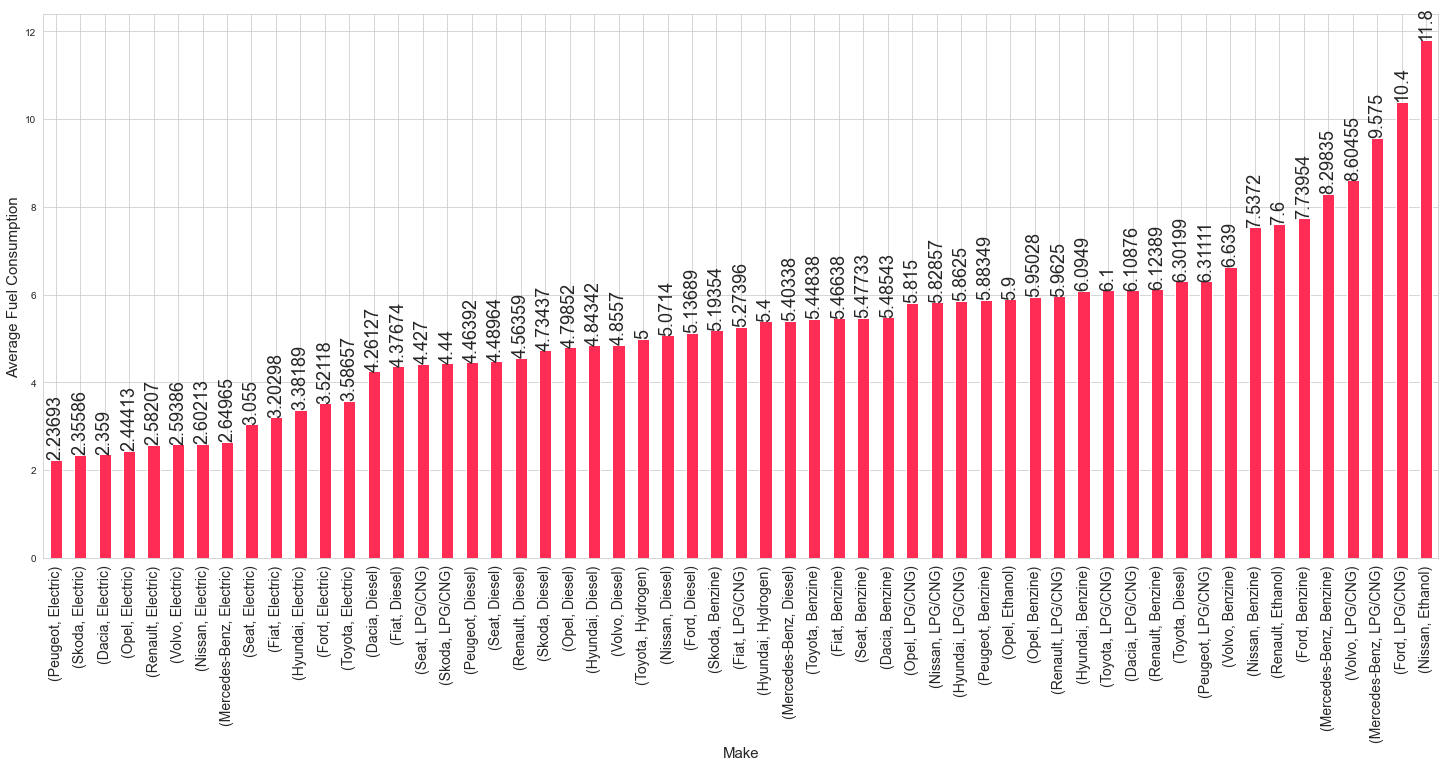

In [35]:
ax = avg_fuel_cons.plot.bar(figsize = (25,10),color='#ff2d55');
plt.bar_label(ax.containers[0], fontsize=18, rotation = 90);
plt.xticks(rotation=90,fontsize=14);
plt.xlabel('Make', fontsize=15)
plt.ylabel('Average Fuel Consumption', fontsize=15);

In [36]:
avg_fuel_cons.unstack(level = 0)

make,Dacia,Fiat,Ford,Hyundai,Mercedes-Benz,Nissan,Opel,Peugeot,Renault,Seat,Skoda,Toyota,Volvo
fuel,,,,,,,,,,,,,
Benzine,5.49,5.47,7.74,6.09,8.30,7.54,5.95,5.88,6.12,5.48,5.19,5.45,6.64
Diesel,4.26,4.38,5.14,4.84,5.40,5.07,4.80,4.46,4.56,4.49,4.73,6.30,4.86
Electric,2.36,3.20,3.52,3.38,2.65,2.60,2.44,2.24,2.58,3.06,2.36,3.59,2.59
Ethanol,NaN,NaN,NaN,NaN,NaN,11.80,5.90,NaN,7.60,NaN,NaN,NaN,NaN
Hydrogen,NaN,NaN,NaN,5.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN
LPG/CNG,6.11,5.27,10.40,5.86,9.57,5.83,5.81,6.31,5.96,4.43,4.44,6.10,8.60


In [37]:
avg_fuel_cons.unstack(level = 1)

fuel,Benzine,Diesel,Electric,Ethanol,Hydrogen,LPG/CNG
make,,,,,,
Dacia,5.49,4.26,2.36,NaN,NaN,6.11
Fiat,5.47,4.38,3.20,NaN,NaN,5.27
Ford,7.74,5.14,3.52,NaN,NaN,10.40
Hyundai,6.09,4.84,3.38,NaN,5.40,5.86
Mercedes-Benz,8.30,5.40,2.65,NaN,NaN,9.57
Nissan,7.54,5.07,2.60,11.80,NaN,5.83
Opel,5.95,4.80,2.44,5.90,NaN,5.81
Peugeot,5.88,4.46,2.24,NaN,NaN,6.31
Renault,6.12,4.56,2.58,7.60,NaN,5.96


### 6. What are the ``lowest`` and ``highest`` sales ``prices`` of the vehicles according to the ``make & model``? And find the ``selling price`` ``difference`` for each ``make & model`` group. Which vehicle group has the ``biggest price difference``?

In [38]:
min_max_price = df.groupby(['make']).agg({'price' : ['max','min']}).sort_values(by=("price", 'max'), ascending=False)
min_max_price

price        
                     max     min
make                            
Ford          1075900.00 1299.00
Mercedes-Benz  344900.00 1790.00
Nissan         237500.00 1000.00
Volvo           97450.00 1600.00
Renault         81980.00  490.00
Toyota          80490.00 1200.00
Hyundai         75991.00  700.00
Skoda           74490.00 1400.00
Peugeot         64290.00  790.00
Opel            59990.00  800.00
Seat            51990.00  999.00
Fiat            41570.00 1199.00
Dacia           29950.00 1490.00

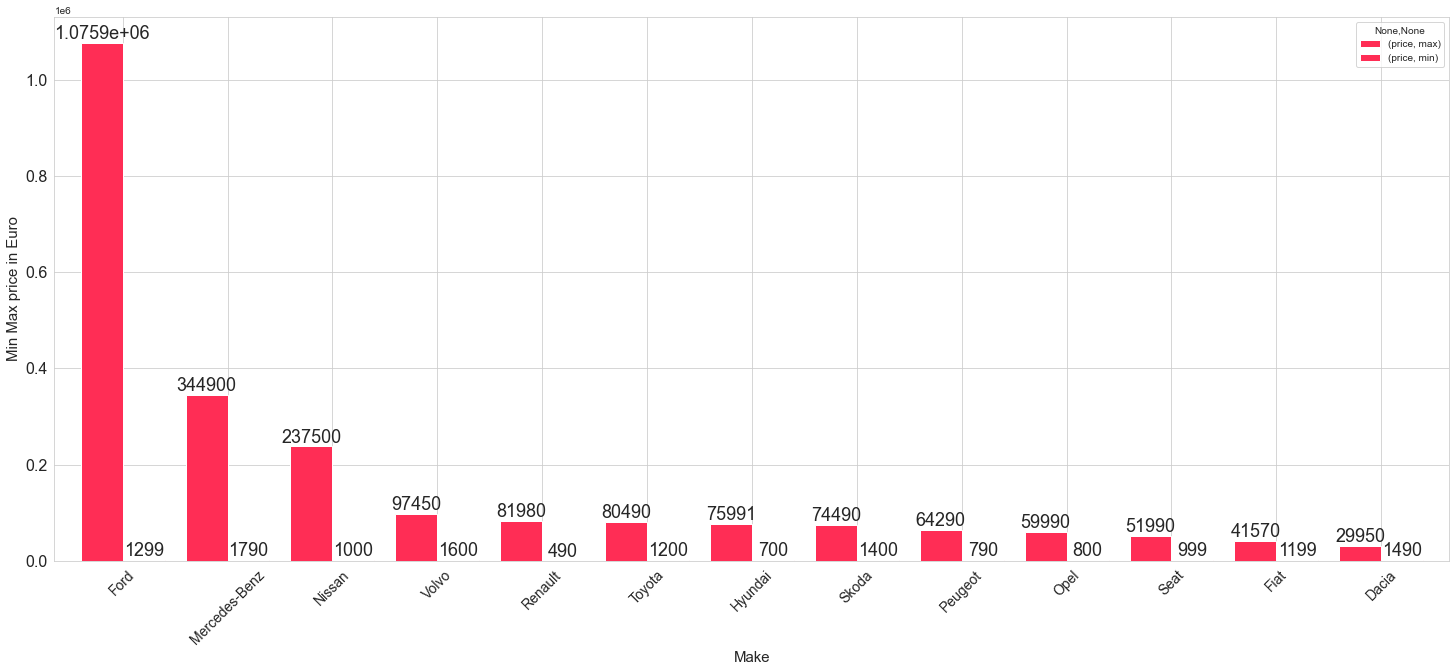

In [39]:
ax = min_max_price.plot.bar(figsize=(25, 10), fontsize=16, width=0.8, rot=45,color='#ff2d55')
plt.bar_label(ax.containers[0], fontsize=18, rotation = 0);
plt.bar_label(ax.containers[1], fontsize=18, rotation = 0);
plt.xticks(rotation=45,fontsize=14);
plt.xlabel('Make', fontsize=15)
plt.ylabel('Min Max price in Euro', fontsize=15);

In [40]:
min_max_price

price        
                     max     min
make                            
Ford          1075900.00 1299.00
Mercedes-Benz  344900.00 1790.00
Nissan         237500.00 1000.00
Volvo           97450.00 1600.00
Renault         81980.00  490.00
Toyota          80490.00 1200.00
Hyundai         75991.00  700.00
Skoda           74490.00 1400.00
Peugeot         64290.00  790.00
Opel            59990.00  800.00
Seat            51990.00  999.00
Fiat            41570.00 1199.00
Dacia           29950.00 1490.00

In [41]:
min_max_price['price', 'difference'] = min_max_price['price', 'max'] - min_max_price['price', 'min']
min_max_price.sort_values(by=('price', 'difference'), ascending=False)

price                   
                     max     min difference
make                                       
Ford          1075900.00 1299.00 1074601.00
Mercedes-Benz  344900.00 1790.00  343110.00
Nissan         237500.00 1000.00  236500.00
Volvo           97450.00 1600.00   95850.00
Renault         81980.00  490.00   81490.00
Toyota          80490.00 1200.00   79290.00
Hyundai         75991.00  700.00   75291.00
Skoda           74490.00 1400.00   73090.00
Peugeot         64290.00  790.00   63500.00
Opel            59990.00  800.00   59190.00
Seat            51990.00  999.00   50991.00
Fiat            41570.00 1199.00   40371.00
Dacia           29950.00 1490.00   28460.00

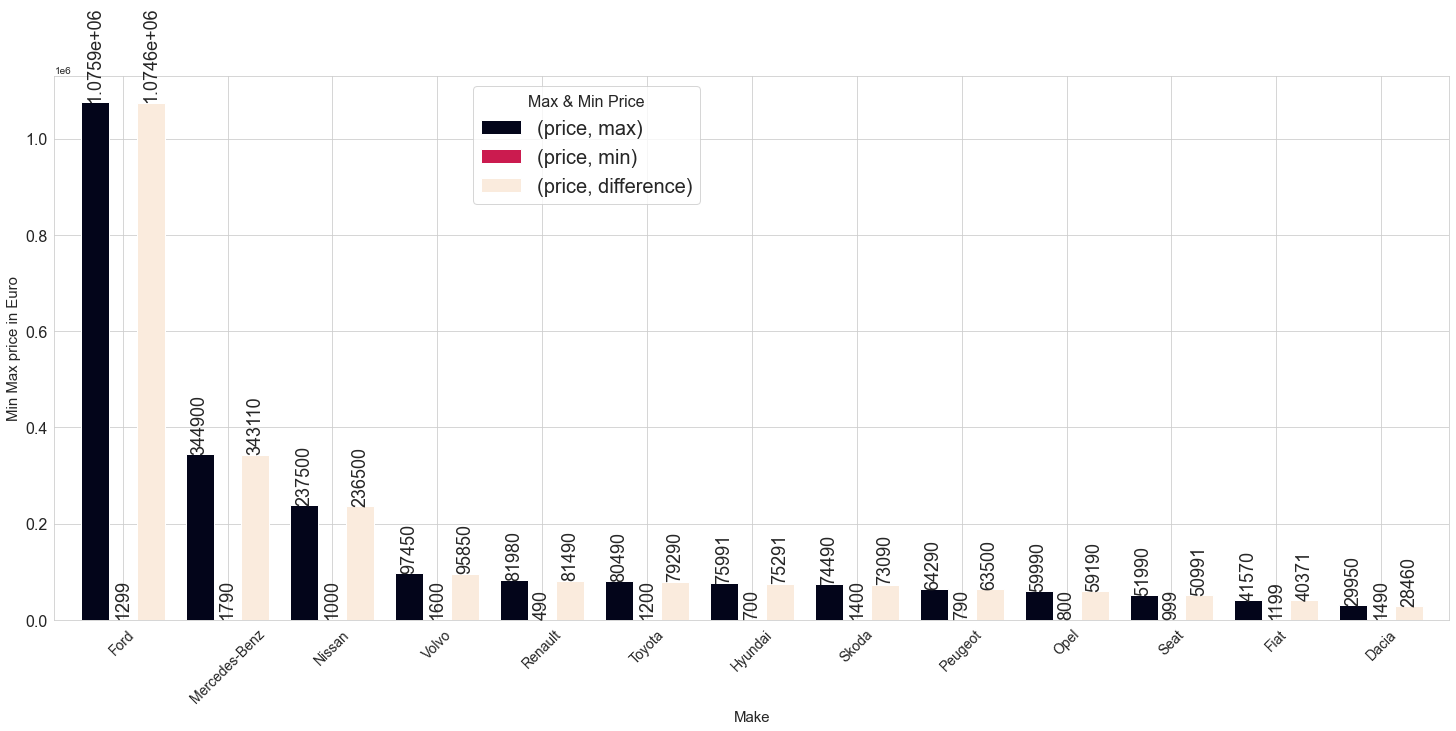

In [42]:
ax = min_max_price.plot.bar(figsize=(25, 10), fontsize=16, width=0.8, rot=45,cmap='rocket')
plt.bar_label(ax.containers[0], fontsize=18, rotation = 90);
plt.bar_label(ax.containers[1], fontsize=18, rotation = 90);
plt.bar_label(ax.containers[2], fontsize=18, rotation = 90);

plt.xticks(rotation=45,fontsize=14);
plt.xlabel('Make', fontsize=15)
plt.ylabel('Min Max price in Euro', fontsize=15);
plt.legend(title="Max & Min Price", title_fontsize=16, prop={'size': 20}, bbox_to_anchor=(0.47, 1));

### 7. What is the ``average`` selling ``price`` of vehicles whose ``make & model`` is ``Ford Fiesta`` and ``body_type`` is ``Sedan``?

In [43]:
df.loc[(df.make_model == 'Ford Fiesta') & (df.body_type == 'Sedan')].price.mean()

17408.605095541403

In [44]:
df.loc[(df.make_model == 'Ford Fiesta') & (df.body_type == 'Sedan')].groupby('age').price.mean()

age
0.00    21134.12
1.00    20988.18
2.00    18173.27
3.00    15947.20
4.00    14698.36
5.00    13444.83
6.00    10019.80
7.00     9194.00
8.00     7980.00
11.00    7450.00
12.00    6267.50
13.00    4890.00
Name: price, dtype: float64

In [45]:
df.loc[(df.make_model == 'Ford Fiesta') & (df.body_type == 'Sedan')].groupby(['age','country']).price.mean()

age    country
0.00   Germany   21134.12
1.00   Belgium   15750.00
       Germany   21278.35
       Spain     15490.00
2.00   Belgium   13490.00
       Germany   18303.36
3.00   Germany   15947.20
4.00   Germany   14836.86
       Spain     11790.00
5.00   Germany   13444.83
6.00   Germany    9877.25
       Spain     10590.00
7.00   Belgium    9500.00
       Germany    8888.00
8.00   Germany    7980.00
11.00  Germany    7450.00
12.00  Germany    6267.50
13.00  Germany    4890.00
Name: price, dtype: float64

### 8. What are the ``average``, ``minimum`` and ``maximum`` selling ``prices`` of vehicles by ``body_type``?

In [46]:
df.groupby(['make_model', 'body_type']).agg({'price': ['mean', 'min', 'max']})

price                  
                                  mean      min      max
make_model   body_type                                  
Dacia Break  Station wagon    20500.00 20500.00 20500.00
Dacia Dokker Compact          11930.00 11930.00 11930.00
             Off-Road/Pick-up 12490.00 12490.00 12490.00
             Sedan             8900.00  8900.00  8900.00
             Station wagon    13344.12  3890.00 19997.00
...                                ...      ...      ...
Volvo XC70   Station wagon    21161.92  8750.00 29990.00
Volvo XC90   Coupe            49900.00 49900.00 49900.00
             Off-Road/Pick-up 51848.59  6400.00 97450.00
             Sedan            60366.67 47700.00 84900.00
             Station wagon    32750.00 29500.00 36000.00

[1038 rows x 3 columns]

In [47]:
min_max_avg_price = df.groupby(['body_type']).agg({'price': ['max', 'min', 'mean']}).sort_values(by=('price', 'max'), ascending=False)
min_max_avg_price

price                 
                        max     min     mean
body_type                                   
Coupe            1075900.00  490.00 30998.68
Off-Road/Pick-up  344900.00 3295.00 29324.97
Convertible       283900.00  699.00 21099.55
Compact           184900.00  950.00 15985.41
Sedan             179900.00  999.00 22550.23
Station wagon     177879.00  790.00 22282.63

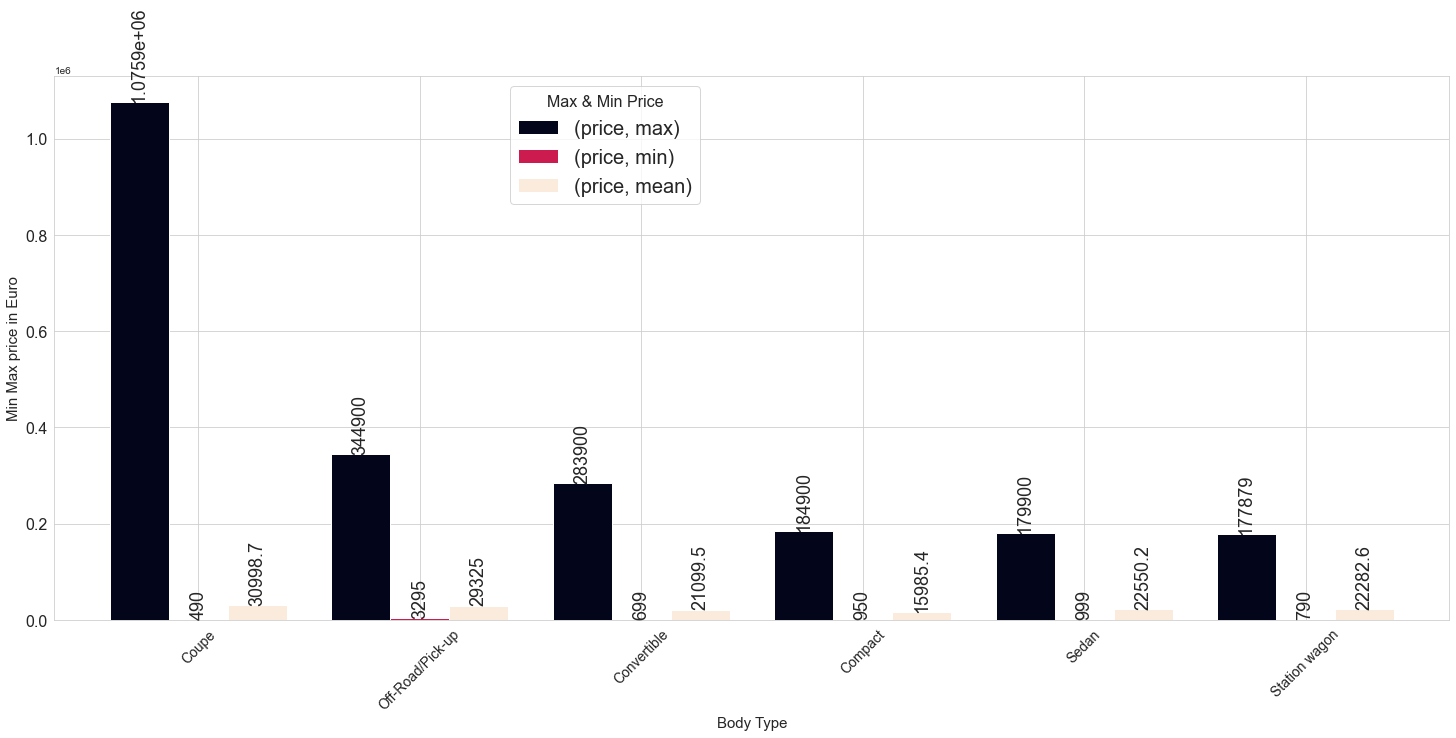

In [48]:
ax = min_max_avg_price.plot.bar(figsize=(25, 10), fontsize=16, width=0.8, rot=45,cmap='rocket')
plt.bar_label(ax.containers[0], fontsize=18, rotation = 90);
plt.bar_label(ax.containers[1], fontsize=18, rotation = 90);
plt.bar_label(ax.containers[2], fontsize=18, rotation = 90);

plt.xticks(rotation=45,fontsize=14);
plt.xlabel('Body Type', fontsize=15)
plt.ylabel('Min Max price in Euro', fontsize=15);
plt.legend(title="Max & Min Price", title_fontsize=16, prop={'size': 20}, bbox_to_anchor=(0.47, 1));

### 9. What is the ``make_model`` of the vehicles whose sales ``price`` is ``below`` 50000 € (inclusive)?

In [49]:
df[df.price < 5000].make_model.unique()

array(['Mercedes-Benz C 160', 'Mercedes-Benz A 160',
       'Mercedes-Benz A 180', 'Mercedes-Benz SLK 200',
       'Mercedes-Benz C 200', 'Mercedes-Benz CLK 320',
       'Mercedes-Benz E 200', 'Opel Corsa', 'Opel Astra', 'Opel Agila',
       'Opel Vectra', 'Opel Tigra', 'Opel Zafira', 'Renault Laguna',
       'Renault Megane', 'Renault Clio', 'Renault Twingo', 'Renault Wind',
       'Renault Twizy', 'Renault Avantime', 'Renault Kangoo',
       'Peugeot 206', 'Peugeot 307', 'Peugeot 207', 'Peugeot 308',
       'Peugeot 208', 'Peugeot 107', 'Peugeot 106', 'Peugeot 1007',
       'Peugeot Expert', 'Peugeot 407', 'Peugeot 406', 'Peugeot Bipper',
       'Peugeot Ranch', 'Peugeot 607', 'Fiat Stilo', 'Fiat Panda',
       'Fiat Grande Punto', 'Fiat Punto Evo', 'Fiat Punto',
       'Fiat Seicento', 'Fiat Croma', 'Fiat Sedici', 'Fiat Multipla',
       'Fiat Bravo', 'Fiat 500', 'Seat Cordoba', 'Seat Ibiza',
       'Seat Leon', 'Seat Altea XL', 'Seat Mii', 'Seat Arosa',
       'Seat Altea', 'Seat E

### What is the average price of car models in the Netherlands that have a price less than 5000 euros?

In [50]:
df[(df.price < 5000) & (df.country == 'Netherlands')].groupby('make_model').price.mean().sort_values()

make_model
Peugeot 106       950.00
Nissan Almera    1395.00
Fiat Punto       1481.33
Dacia Logan      1650.00
Fiat Seicento    1900.00
                   ...  
Fiat Punto Evo   4643.00
Toyota Corolla   4715.00
Hyundai ACCENT   4950.00
Peugeot 208      4950.00
Toyota RAV 4     4999.00
Name: price, Length: 64, dtype: float64

In [51]:
df[(df.price < 5000) & (df.country == 'Netherlands')].sort_values(by='price')

,make_model,make,model,price,body_type,age,fuel,country,type,warranty,mileage,gearbox,seller,engine_size,gears,co2_emissions,drivetrain,cylinders,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,power_hp,fuel_consumption_avg,address,latitude,longitude,cc,ss,em
6740,Peugeot 106,Peugeot,106,950.00,Compact,20.00,Benzine,Netherlands,Used,No,166979.00,Manual,Dealer,1124.00,5.00,147.00,Front,4.00,Sport seats,790.00,No,Cloth,1.00,efficient,60.00,6.20,"Nijverheidsstraat 10, 3133 ER Vlaardingen, Net...",51.90,4.33,premium,Safety Security Standard,Entertainment Media Standard
7163,Peugeot 206,Peugeot,206,950.00,Convertible,20.00,Benzine,Netherlands,Used,No,238413.00,Manual,Dealer,1997.00,5.00,191.00,Front,4.00,Alloy wheels,1127.00,No,Part/Full Leather,3.00,efficient,136.00,8.00,"Celsiusstraat 1, 3316 AC Dordrecht, Netherlands",51.80,4.64,standard,Safety Security Standard,Entertainment Media Standard
7138,Peugeot 206,Peugeot,206,950.00,Convertible,20.00,Benzine,Netherlands,Used,No,170439.00,Manual,Dealer,1997.00,5.00,191.00,Front,4.00,"Alloy wheels (16""), Sport seats",1127.00,No,Part/Full Leather,2.00,efficient,136.00,8.00,"Techniekweg 9, 8304 AW Emmeloord, Netherlands",52.70,5.76,premium,Safety Security Standard,Entertainment Media Standard
4894,Renault Megane,Renault,Megane,995.00,Convertible,17.00,Benzine,Netherlands,Used,No,257944.00,Manual,Dealer,1598.00,5.00,164.00,Front,4.00,"Alloy wheels (15""), Automatically dimming inte...",1295.00,Yes,Cloth,1.00,efficient,113.00,6.90,"Ettenseweg 76, 4706 PB Roosendaal, Netherlands",51.54,4.50,premium,Safety Security Standard,Entertainment Media Standard
7110,Peugeot 206,Peugeot,206,999.00,Convertible,19.00,Benzine,Netherlands,Used,No,178000.00,Manual,Private seller,1997.00,5.00,191.00,Front,4.00,"Alloy wheels, Sport seats, Summer tyres",1127.00,No,Part/Full Leather,5.00,efficient,136.00,8.00,"1445 RX, Netherlands",52.51,4.98,premium_plus,Safety Security Premium,Entertainment Media Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16330,Toyota RAV 4,Toyota,RAV 4,4999.00,Off-Road/Pick-up,19.00,Diesel,Netherlands,Used,No,290441.00,Manual,Dealer,1995.00,6.00,167.00,4WD,4.00,"Alloy wheels (16""), Trailer hitch",1345.00,No,Cloth,2.00,efficient,116.00,7.20,"Handelsweg 2, 7451 PJ Holten, Netherlands",52.28,6.40,premium,Safety Security Standard,Entertainment Media Standard
8920,Fiat Punto Evo,Fiat,Punto Evo,4999.00,Compact,9.00,Diesel,Netherlands,Used,No,142178.00,Manual,Dealer,1248.00,5.00,88.00,Front,4.00,"Alloy wheels (15"")",1120.00,Yes,Cloth,3.00,inefficient,84.00,3.40,"Kapitein Nemostraat 34, 7821 AC Emmen, Netherl...",52.77,6.92,standard,Safety Security Premium,Entertainment Media Standard
21634,Hyundai Coupe,Hyundai,Coupe,4999.00,Coupe,18.00,Benzine,Netherlands,Used,No,154289.00,Manual,Private seller,1975.00,5.00,193.00,Front,4.00,"All season tyres, Cargo barrier, Emergency tyr...",1282.00,No,Part/Full Leather,2.00,efficient,143.00,8.00,"6121, Netherlands",51.03,5.81,premium,Safety Security Premium,Entertainment Media Premium
5051,Renault Megane,Renault,Megane,4999.00,Convertible,13.00,Benzine,Netherlands,Used,No,195000.00,Manual,Private seller,1598.00,5.00,166.00,Front,4.00,"Summer tyres, Winter tyres",1295.00,No,Part/Full Leather,2.00,efficient,111.00,7.00,"1704 BG, Netherlands",52.71,4.85,premium,Safety Security Premium,Entertainment Media Standard


#### What is the average price and average age of car models in the Netherlands that have a price less than 5000 euros?

In [52]:
df[(df.price < 5000) & (df.country == 'Netherlands')].groupby('make_model').agg({'price': 'mean', 'age': 'mean'}).sort_values('price')

,price,age
make_model,,
Peugeot 106,950.00,20.00
Nissan Almera,1395.00,19.00
Fiat Punto,1481.33,17.00
Dacia Logan,1650.00,15.00
Fiat Seicento,1900.00,19.00
...,...,...
Fiat Punto Evo,4643.00,9.67
Toyota Corolla,4715.00,17.00
Hyundai ACCENT,4950.00,13.00


In [53]:
df[(df.price < 2000) & (df.country == 'Netherlands')].groupby('make_model').agg({'price': 'mean', 'age': 'mean'}).sort_values('price')

,price,age
make_model,,
Peugeot 106,950.00,20.00
Renault Laguna,1250.00,18.00
Opel Corsa,1330.00,18.50
Nissan Almera,1395.00,19.00
Fiat Punto,1481.33,17.00
Peugeot 206,1517.17,19.30
Nissan Primera,1540.43,17.71
Volvo C70,1600.00,20.00
Opel Astra,1603.40,18.60


In [54]:
df.make.unique()

array(['Mercedes-Benz', 'Opel', 'Renault', 'Peugeot', 'Fiat', 'Seat',
       'Skoda', 'Dacia', 'Toyota', 'Nissan', 'Ford', 'Hyundai', 'Volvo'],
      dtype=object)

### 10. What is the most common ``gearbox`` type among the vehicles for sale whose ``make & model`` is ``Renault Megane`` and ``body`` is ``Sedan``?

In [55]:
df.make_model.value_counts()

make_model
Renault Megane            825
Seat Leon                 757
Dacia Sandero             718
Hyundai i30               699
Opel Astra                634
                         ... 
Mercedes-Benz S 65 AMG      1
Mercedes-Benz CLK 320       1
Toyota GR86                 1
Toyota Tacoma               1
Renault R 11                1
Name: count, Length: 490, dtype: int64

In [56]:
df[(df["make_model"] == "Renault Megane") & (df["body_type"] == "Sedan")].gearbox.mode()

0    Manual
Name: gearbox, dtype: object

# An Analysis of Inferential Statistics/ Hypothesis Testing on Some Specific Features

In [57]:
df.select_dtypes(exclude=["number", "bool_"]).head(3)

,make_model,make,model,body_type,fuel,country,type,warranty,gearbox,seller,drivetrain,extras,full_service_history,upholstery,energy_efficiency_class,address,cc,ss,em
0,Mercedes-Benz A 160,Mercedes-Benz,A 160,Compact,Diesel,Spain,Used,Yes,Manual,Dealer,Front,Alloy wheels,No,Cloth,efficient,"Calle Forja 6, 11500 El Puerto de Santa María,...",premium,Safety Security Premium,Entertainment Media Standard
1,Mercedes-Benz EQE 350,Mercedes-Benz,EQE 350,Compact,Electric,Spain,Pre-registered,Yes,Automatic,Dealer,4WD,"Alloy wheels (21""), Shift paddles, Sport packa...",No,Part/Full Leather,efficient,"Calle Logroño, 28649 Rozas de Puerto Real, Mad...",premium_plus,Safety Security Premium Plus,Entertainment Media Premium
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,Compact,Benzine,Spain,Used,Yes,Automatic,Dealer,4WD,Alloy wheels,No,Part/Full Leather,inefficient,"Muelle de Llevant, 43004 Tarragona, Spain",premium,Safety Security Standard,Entertainment Media Standard


ANOVA

### Is there statistically any correlation between fuel types on car prices❓

In [58]:
fuel_types = df['fuel'].unique()

grouped = df.groupby('fuel')

the Shapiro-Wilk test is to test the null hypothesis that the data is drawn from a normal distribution. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that the data is not normally distributed. If the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that the data is normally distributed.

Levene's test is used to check if the variances of two or more groups are equal. In this case, we are performing Levene's test for each fuel type in the dataframe, where the groups are defined by the fuel type. The null hypothesis of the test is that the variances of the groups are equal. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that the variances are not equal.

In [59]:
# Null Hypothesis (H0): The prices for each fuel type are normally distributed
# Alternative Hypothesis (H1): The prices for at least one fuel type are not normally distributed

# Set significance level
alpha = 0.05
print('Shapiro-Wilk test for normality:')
for fuel_type in df['fuel'].unique():
    # Perform Shapiro-Wilk test
    stat, p = stats.shapiro(grouped.get_group(fuel_type)['price'])
    # Write scientific comment
    alpha = 0.05
    if p < alpha:
        print(f'{fuel_type}: The data is not normally distributed (p={p:.3f}). Reject H0 of the data is normally distributed.')
    else:
        print(f'{fuel_type}: The data is normally distributed (p={p:.3f}). Fail to reject H0 of the data is normally distributed.')




# Null Hypothesis (H0): The variances of the prices for each fuel type are equal
# Alternative Hypothesis (H1): The variances of the prices for at least one fuel type are not equal
print("\nLevene's test for equal variances:")
# Perform Levene's test
stat, p = stats.levene(*[grouped.get_group(fuel_type)['price'] for fuel_type in df['fuel'].unique()])

alpha = 0.05
if p < alpha:
    print("\nThe p-value of the Levene's test is less than the chosen significance level of", alpha)
    print('Therefore, we reject the null hypothesis(H0) that the variances are equal.')
    print(Fore.RED + Style.BRIGHT + f'The variances of the prices for at least one fuel type are not equal (p={p:.3f}).')
else:
    print('\nThe p-value of the Levene\'s test is greater than or equal to the chosen significance level of', alpha)
    print('Therefore, we fail to reject H0 that the variances are equal')
    print(Fore.RED + Style.BRIGHT + f'The variances of the prices for each fuel type are equal (p={p:.3f}).')

Shapiro-Wilk test for normality:
Diesel: The data is not normally distributed (p=0.000). Reject H0 of the data is normally distributed.
Electric: The data is not normally distributed (p=0.000). Reject H0 of the data is normally distributed.
Benzine: The data is not normally distributed (p=0.000). Reject H0 of the data is normally distributed.
LPG/CNG: The data is not normally distributed (p=0.000). Reject H0 of the data is normally distributed.
Ethanol: The data is not normally distributed (p=0.028). Reject H0 of the data is normally distributed.
Hydrogen: The data is not normally distributed (p=0.018). Reject H0 of the data is normally distributed.

Levene's test for equal variances:

The p-value of the Levene's test is less than the chosen significance level of 0.05
Therefore, we reject the null hypothesis(H0) that the variances are equal.
The variances of the prices for at least one fuel type are not equal (p=0.000).


/Users/mac/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The Welch's ANOVA test is appropriate when the assumptions of normality and equal variance are not met. It is a robust test that can handle violations of these assumptions, making it suitable for analyzing data with non-normal distributions and unequal variances.
Therefore, in this case, it is appropriate to use the Welch's ANOVA test to determine whether there is a statistically significant correlation between fuel types and car prices, even if the prices for at least one fuel type are not normally distributed and the variances of the prices for at least one fuel type are not equal.

In [60]:
# Hypothesis: We want to test if there is a significant difference in the mean price of vehicles 
# based on the type of fuel they use (benzine, diesel, electric, etc.)

h0 = 'There is no significant difference in the mean price of vehicles based on fuel type'
h1 = 'There is a significant difference in the mean price of vehicles based on fuel type'

print(Fore.BLUE + 'Null hypothesis: ' + h0 + Style.RESET_ALL)
print(Fore.BLUE + 'Alternative hypothesis: ' + h1 + Style.RESET_ALL)

# Perform ANOVA with Welch's correction
aov = pg.welch_anova(dv='price', between='fuel', data=df)

alpha = 0.05
# Print scientific hypothesis test results
if aov['p-unc'][0] < alpha:
    print('\nThe p-value of the Welch\'s ANOVA test is less than the chosen significance level of', alpha)
    print('Therefore, we reject the null hypothesis.')
    print('We conclude that there is a', Fore.RED + Style.BRIGHT + 'statistically significant difference' + Style.RESET_ALL, 'in prices among the different fuel types.')
else:
    print('\nThe p-value of the Welch\'s ANOVA test is greater than or equal to the chosen significance level of', alpha)
    print('Therefore, we fail to reject the null hypothesis.')
    print("There is not enough evidence to reject the null hypothesis that the means are equal.")
    print('We conclude that there is', Fore.RED + Style.BRIGHT + 'no statistically significant difference' + Style.RESET_ALL, 'in prices among the different fuel types.')

Null hypothesis: There is no significant difference in the mean price of vehicles based on fuel type
Alternative hypothesis: There is a significant difference in the mean price of vehicles based on fuel type

The p-value of the Welch's ANOVA test is less than the chosen significance level of 0.05
Therefore, we reject the null hypothesis.
We conclude that there is a statistically significant difference in prices among the different fuel types.


### Is there a statistically significant difference in prices among the different body types.❓

In [61]:
body_types = df['body_type'].unique()
body_types

array(['Compact', 'Convertible', 'Coupe', 'Off-Road/Pick-up',
       'Station wagon', 'Sedan'], dtype=object)

In [62]:
df['body_type'].value_counts()

body_type
Off-Road/Pick-up    4889
Station wagon       4882
Compact             4864
Sedan               4858
Coupe               2836
Convertible         2478
Name: count, dtype: int64

In this scenario, the Anderson-Darling test is preferred over the Shapiro-Wilk test to assess the normality of the distribution of car prices for different body types, particularly due to the relatively large sample sizes ranging between 2500 to 5000. While the Shapiro-Wilk test is also commonly used to assess normality, it may not be as powerful as the Anderson-Darling test in detecting deviations from normality, especially with larger sample sizes. The Anderson-Darling test is particularly useful in this scenario because it has higher power to detect deviations from normality, particularly in the tails of the distribution, which is important when dealing with large sample sizes. 

In [63]:
from scipy.stats import anderson

for body_type in df['body_type'].unique():
      prices = df.loc[df['body_type'] == body_type, 'price']

      # Perform the Anderson-Darling test
      result = anderson(prices)
      statistic = result.statistic
      critical_values = result.critical_values
      significance_level = result.significance_level

      # Print the null hypothesis and alternative hypothesis
      print(f'\n{body_type}: {Fore.GREEN}Null hypothesis{Style.RESET_ALL} = the distribution of prices is normal, '\
            f'{Fore.RED}Alternative hypothesis{Style.RESET_ALL} = the distribution of prices is not normal')

      # Print the results and conclusion
      # print(f'\n{body_type}:\nstatistic={statistic}, ',f'critical_values={list(critical_values)}, ',f'significance_level={significance_level}')
      
      # Check if the null hypothesis of normality can be rejected
      if statistic > critical_values[2]:
            print(f'{Fore.RED}Conclusion{Style.RESET_ALL}: The null hypothesis can be rejected '
                  f'at the 5% significance level, indicating that the '
                  f'{Fore.BLUE}distribution of prices{Style.RESET_ALL} for {body_type} is significantly '
                  f'{Fore.YELLOW}non-normal{Style.RESET_ALL}.')
      else:
            print(f'{Fore.GREEN}Conclusion{Style.RESET_ALL}: The null hypothesis cannot be rejected '
                  f'at the 5% significance level, indicating that the '
                  f'{Fore.BLUE}distribution of prices{Style.RESET_ALL} for {body_type} is consistent '
                  f'with {Fore.GREEN}normality{Style.RESET_ALL}.')




Compact: Null hypothesis = the distribution of prices is normal, Alternative hypothesis = the distribution of prices is not normal
Conclusion: The null hypothesis can be rejected at the 5% significance level, indicating that the distribution of prices for Compact is significantly non-normal.

Convertible: Null hypothesis = the distribution of prices is normal, Alternative hypothesis = the distribution of prices is not normal
Conclusion: The null hypothesis can be rejected at the 5% significance level, indicating that the distribution of prices for Convertible is significantly non-normal.

Coupe: Null hypothesis = the distribution of prices is normal, Alternative hypothesis = the distribution of prices is not normal
Conclusion: The null hypothesis can be rejected at the 5% significance level, indicating that the distribution of prices for Coupe is significantly non-normal.

Off-Road/Pick-up: Null hypothesis = the distribution of prices is normal, Alternative hypothesis = the distributi

In [64]:
feature = 'body_type'
# Null Hypothesis (H0): The prices for each group are normally distributed
# Alternative Hypothesis (H1): The prices for at least one group are not normally distributed

# Set significance level
alpha = 0.05
print('Shapiro-Wilk test for normality:')
grouped = df.groupby(feature)
for x in df[feature]. unique():
    # Perform Shapiro-Wilk test
    # plt.hist(grouped.get_group(x)['price'], bins=20)
    # plt.title(x)
    # plt.show()
    stat, p = stats.shapiro(grouped.get_group(x)['price'])
    # Write scientific comment
    alpha = 0.05
    if p < alpha:
        print(f'{x}: The data is not normally distributed (p={p:.3f}). Reject H0 of the data is normally distributed.')
    else:
        print(f'{x}: The data is normally distributed (p={p:.3f}). Fail to reject H0 of the data is normally distributed.')




# Null Hypothesis (H0): The variances of the prices for each group are equal
# Alternative Hypothesis (H1): The variances of the prices for at least one group are not equal
print("\nLevene's test for equal variances:")
# Perform Levene's test
stat, p = stats.levene(*[grouped.get_group(x)['price'] for x in df[feature].unique()])

alpha = 0.05
if p < alpha:
    print("\nThe p-value of the Levene's test is less than the chosen significance level of", alpha)
    print('Therefore, we reject the null hypothesis(H0) that the variances are equal.')
    print(Fore.RED + Style.BRIGHT + f'The variances of the prices for at least one {feature} are not equal (p={p:.3f}).')
else:
    print('\nThe p-value of the Levene\'s test is greater than or equal to the chosen significance level of', alpha)
    print('Therefore, we fail to reject H0 that the variances are equal')
    print(Fore.RED + Style.BRIGHT + f'The variances of the prices for each {feature} are equal (p={p:.3f}).')

Shapiro-Wilk test for normality:
Compact: The data is not normally distributed (p=0.000). Reject H0 of the data is normally distributed.
Convertible: The data is not normally distributed (p=0.000). Reject H0 of the data is normally distributed.
Coupe: The data is not normally distributed (p=0.000). Reject H0 of the data is normally distributed.
Off-Road/Pick-up: The data is not normally distributed (p=0.000). Reject H0 of the data is normally distributed.
Station wagon: The data is not normally distributed (p=0.000). Reject H0 of the data is normally distributed.
Sedan: The data is not normally distributed (p=0.000). Reject H0 of the data is normally distributed.

Levene's test for equal variances:

The p-value of the Levene's test is less than the chosen significance level of 0.05
Therefore, we reject the null hypothesis(H0) that the variances are equal.
The variances of the prices for at least one body_type are not equal (p=0.000).


Welch's ANOVA is more robust to violations of the assumption of equal variances.
While Welch's ANOVA does not assume equal variances, it does assume normality of the data within each group. Therefore, if the data within each group is not normally distributed, a non-parametric test such as the Kruskal-Wallis test may be more appropriate.

In [65]:
# Hypothesis: We want to test if there is a significant difference in the mean price of vehicles 
# based on the body type
feature = 'body_type'

h0 = f'There is no significant difference in the mean price of vehicles based on {feature}'
h1 = f'There is a significant difference in the mean price of vehicles based on {feature}'

print(Fore.BLUE + 'Null hypothesis: ' + h0 + Style.RESET_ALL)
print(Fore.BLUE + 'Alternative hypothesis: ' + h1 + Style.RESET_ALL)

# Perform ANOVA with Welch's correction
aov = pg.welch_anova(dv='price', between=feature, data=df)

alpha = 0.05
# Print scientific hypothesis test results
if aov['p-unc'][0] < alpha:
    print('\nThe p-value of the Welch\'s ANOVA test is less than the chosen significance level of', alpha)
    print('Therefore, we reject the null hypothesis.')
    print('We conclude that there is a', Fore.RED + Style.BRIGHT + 'statistically significant difference' + Style.RESET_ALL, f'in prices among the different {feature}.')
else:
    print('\nThe p-value of the Welch\'s ANOVA test is greater than or equal to the chosen significance level of', alpha)
    print('Therefore, we fail to reject the null hypothesis.')
    print("There is not enough evidence to reject the null hypothesis that the means are equal.")
    print('We conclude that there is', Fore.RED + Style.BRIGHT + 'no statistically significant difference' + Style.RESET_ALL, f'in prices among the different {feature}.')

Null hypothesis: There is no significant difference in the mean price of vehicles based on body_type
Alternative hypothesis: There is a significant difference in the mean price of vehicles based on body_type

The p-value of the Welch's ANOVA test is less than the chosen significance level of 0.05
Therefore, we reject the null hypothesis.
We conclude that there is a statistically significant difference in prices among the different body_type.


In [66]:
alpha = 0.05

grouped = df.groupby(feature)
groups = [grouped.get_group(x)['price'] for x in grouped.groups]
stat, p_value = kruskal(*groups)

if p_value < alpha:
    print(f"The Kruskal-Wallis H test was performed to determine if there is a statistically significant difference in prices among the different {Fore.BLUE}body types{Style.RESET_ALL}.\n"
          f"With a significance level of {alpha}, the test resulted in a {Fore.GREEN}p-value{Style.RESET_ALL} of {Fore.GREEN}{p_value:.4f}{Style.RESET_ALL}.\n"
          f"Therefore, we {Fore.GREEN}reject the null hypothesis{Style.RESET_ALL} and {Fore.GREEN}conclude{Style.RESET_ALL} that there is a statistically significant difference in prices among the different body types.")
else:
    print(f"The Kruskal-Wallis H test was performed to determine if there is a statistically significant difference in prices among the different {Fore.BLUE}body types{Style.RESET_ALL}.\n"
          f"With a significance level of {alpha}, the test resulted in a {Fore.GREEN}p-value{Style.RESET_ALL} of {Fore.GREEN}{p_value:.4f}{Style.RESET_ALL}.\n"
          f"Therefore, we {Fore.RED}fail to reject the null hypothesis{Style.RESET_ALL} and {Fore.RED}conclude{Style.RESET_ALL} that there is {Fore.RED}no statistically significant difference{Style.RESET_ALL} in prices among the different body types.")

NameError: name 'kruskal' is not defined

### Is there statistically any correlation between body types on car prices❓

<p>Spearman&apos;s rank correlation coefficient (Spearman&apos;s r) is used in this scenario because the data does not meet the assumptions of Pearson&apos;s correlation coefficient, which assumes a linear relationship between two continuous variables and&nbsp;<a>normal distribution</a> of the data.</p>
<p>In this scenario, the&nbsp;<a>sample sizes</a> are different, the variances are not equal, and the data is not normally distributed. Moreover, the&nbsp;<a>body type</a> is a&nbsp;<a>categorical variable</a>, which cannot be analyzed using Pearson&apos;s correlation coefficient directly. Therefore, Spearman&apos;s r is a more appropriate measure of correlation as it is a non-<a>parametric measure</a> that does not rely on the assumption of normality or linearity of the data.</p>

In [ ]:
alpha = 0.05
feature = 'body_type'
x = df[feature].astype('category').cat.codes
y = df['price']

corr, p_value = spearmanr(x, y)

if p_value < alpha:
    print(f"The Spearman's rank correlation test was performed to determine if there is a statistically significant correlation between {Fore.BLUE}body types{Style.RESET_ALL} and {Fore.BLUE}car prices{Style.RESET_ALL}.\n"
          f"With a significance level of {alpha}, the test resulted in a {Fore.GREEN}p-value{Style.RESET_ALL} of {Fore.GREEN}{p_value:.4f}{Style.RESET_ALL}.\n"
          f"Therefore, we {Fore.GREEN}reject the null hypothesis{Style.RESET_ALL} and {Fore.GREEN}conclude{Style.RESET_ALL} that there is a statistically significant correlation between body types and car prices, with a correlation coefficient of {Fore.GREEN}{corr:.4f}{Style.RESET_ALL}.\n"
          f"This suggests that there is a relationship between body types and car prices, although correlation does not imply causation. Further analysis, such as regression or causal inference, may be needed to explore the potential underlying mechanisms or causal relationships.")
else:
    print(f"The Spearman's rank correlation test was performed to determine if there is a statistically significant correlation between {Fore.BLUE}body types{Style.RESET_ALL} and {Fore.BLUE}car prices{Style.RESET_ALL}.\n"
          f"With a significance level of {alpha}, the test resulted in a {Fore.GREEN}p-value{Style.RESET_ALL} of {Fore.GREEN}{p_value:.4f}{Style.RESET_ALL}.\n"
          f"Therefore, we {Fore.RED}fail to reject the null hypothesis{Style.RESET_ALL} and {Fore.RED}conclude{Style.RESET_ALL} that there is {Fore.RED}no statistically significant correlation{Style.RESET_ALL} between body types and car prices.\n"
          f"This suggests that there may not be a relationship between body types and car prices, although other factors may still be contributing to the price differences.")

The Spearman's rank correlation test was performed to determine if there is a statistically significant correlation between body types and car prices.
With a significance level of 0.05, the test resulted in a p-value of 0.0000.
Therefore, we reject the null hypothesis and conclude that there is a statistically significant correlation between body types and car prices, with a correlation coefficient of 0.1820.
This suggests that there is a relationship between body types and car prices, although correlation does not imply causation. Further analysis, such as regression or causal inference, may be needed to explore the potential underlying mechanisms or causal relationships.


In [ ]:
from scipy.stats import spearmanr
from colorama import Fore, Style

feature = 'body_type'
alpha = 0.05

x = df[feature].astype('category').cat.codes
y = df['price']

# Common guideline for interpreting the strength of the correlation coefficient:
# 0.00 to 0.19: very weak correlation
# 0.20 to 0.39: weak correlation
# 0.40 to 0.59: moderate correlation
# 0.60 to 0.79: strong correlation
# 0.80 to 1.00: very strong correlation

corr, p_value = spearmanr(x, y)

if p_value < alpha:
    if abs(corr) >= 0.60:
        strength = "strong"
    elif abs(corr) >= 0.40:
        strength = "moderate"
    else:
        strength = "weak"
        
    print(f"The Spearman's rank correlation test was performed to determine if there is a statistically significant correlation between {Fore.BLUE}body types{Style.RESET_ALL} and {Fore.BLUE}car prices{Style.RESET_ALL}.\n"
          f"With a significance level of {alpha}, the test resulted in a {Fore.GREEN}p-value{Style.RESET_ALL} of {Fore.GREEN}{p_value:.4f}{Style.RESET_ALL}.\n"
          f"Therefore, we {Fore.GREEN}reject the null hypothesis{Style.RESET_ALL} and {Fore.GREEN}conclude{Style.RESET_ALL} that there is a statistically significant ({strength}) correlation between body types and car prices, with a correlation coefficient of {Fore.GREEN}{corr:.4f}{Style.RESET_ALL}.\n"
          f"This result suggests that there is a {Fore.BLUE}monotonic or non-linear relationship{Style.RESET_ALL} between body types and car prices, where cars with certain body types tend to have higher or lower prices compared to others. However, correlation does not imply causation, and further analysis, such as regression or causal inference, may be needed to explore the underlying mechanisms or causal relationships.")
else:
    print(f"The Spearman's rank correlation test was performed to determine if there is a statistically significant correlation between {Fore.BLUE}body types{Style.RESET_ALL} and {Fore.BLUE}car prices{Style.RESET_ALL}.\n"
          f"With a significance level of {alpha}, the test resulted in a {Fore.GREEN}p-value{Style.RESET_ALL} of {Fore.GREEN}{p_value:.4f}{Style.RESET_ALL}.\n"
          f"Therefore, we {Fore.RED}fail to reject the null hypothesis{Style.RESET_ALL} and {Fore.RED}conclude{Style.RESET_ALL} that there is {Fore.RED}no statistically significant correlation{Style.RESET_ALL} between body types and car prices.\n"
          f"This result suggests that there may not be a relationship between body types and car prices, although other factors may still be contributing to the price differences.")

The Spearman's rank correlation test was performed to determine if there is a statistically significant correlation between body types and car prices.
With a significance level of 0.05, the test resulted in a p-value of 0.0000.
Therefore, we reject the null hypothesis and conclude that there is a statistically significant (weak) correlation between body types and car prices, with a correlation coefficient of 0.1820.
This result suggests that there is a monotonic or non-linear relationship between body types and car prices, where cars with certain body types tend to have higher or lower prices compared to others. However, correlation does not imply causation, and further analysis, such as regression or causal inference, may be needed to explore the underlying mechanisms or causal relationships.


<p>Spearman&apos;s rank correlation coefficient (Spearman&apos;s r) and Pearson&apos;s&nbsp;<a>correlation coefficient</a> (Pearson&apos;s r) are both measures of the strength and direction of the&nbsp;<a>linear relationship</a> between two continuous variables. However, they differ in their assumptions, interpretation, and applicability.</p>
<p>The main difference between Spearman&apos;s r and Pearson&apos;s r is that Spearman&apos;s r is a non-parametric measure of correlation, while Pearson&apos;s r is a parametric measure of correlation.</p>
<p>Spearman&apos;s r is based on the ranks or ordinal positions of the&nbsp;<a>data points</a>, rather than their actual numerical values. It measures the extent to which two variables are related in a monotonic or non-linear way. Spearman&apos;s r is more robust to outliers and non-normal distributions, as it does not assume a linear relationship or normality of the data. Spearman&apos;s r can be used for both continuous and&nbsp;<a>ordinal data</a>.</p>
<p>Pearson&apos;s r, on the other hand, assumes a linear relationship between two variables and&nbsp;<a>normal distribution</a> of the data. It measures the extent to which two variables are related in a linear or straight-line way. Pearson&apos;s r is sensitive to outliers and non-normal distributions, as it assumes a linear relationship and normality of the data. Pearson&apos;s r is best suited for continuous data that are normally distributed.</p>
<p>In summary, Spearman&apos;s r is a non-<a>parametric measure</a> of correlation that is based on ranks and is more robust to non-linear and non-normal data, while Pearson&apos;s r is a parametric measure of correlation that assumes a linear relationship and normality of the data and is best suited for continuous data that are normally distributed. The choice between Spearman&apos;s r and Pearson&apos;s r depends on the type and distribution of the data, the research question, and the assumptions and limitations of each method.</p>

### Is there statistically any correlation between some of car makes (Mercedes-Benz, Opel, Volvo) on car prices❓

In [ ]:
makes = df['make'].unique()
makes

array(['Mercedes-Benz', 'Opel', 'Renault', 'Peugeot', 'Fiat', 'Seat',
       'Skoda', 'Dacia', 'Toyota', 'Nissan', 'Ford', 'Hyundai', 'Volvo'],
      dtype=object)

In [ ]:
df['make'].value_counts()

make
Mercedes-Benz    2257
Peugeot          2248
Renault          2204
Ford             2131
Opel             2087
Fiat             1961
Nissan           1883
Volvo            1853
Hyundai          1814
Toyota           1717
Seat             1686
Skoda            1519
Dacia            1447
Name: count, dtype: int64

In this scenario, the Anderson-Darling test is preferred over the Shapiro-Wilk test to assess the normality of the distribution of car prices for different makes, particularly due to the relatively large sample sizes ranging between 1440 to 2200. While the Shapiro-Wilk test is also commonly used to assess normality, it may not be as powerful as the Anderson-Darling test in detecting deviations from normality, especially with larger sample sizes. The Anderson-Darling test is particularly useful in this scenario because it has higher power to detect deviations from normality, particularly in the tails of the distribution, which is important when dealing with large sample sizes. 

In [ ]:
from scipy.stats import anderson
feature = 'make'
for x in df[feature].unique():
      prices = df.loc[df[feature] == x, 'price']

      # Perform the Anderson-Darling test
      result = anderson(prices)
      statistic = result.statistic
      critical_values = result.critical_values
      significance_level = result.significance_level

      # Print the null hypothesis and alternative hypothesis
      print(f'\n{x}: {Fore.GREEN}Null hypothesis{Style.RESET_ALL} = the distribution of prices is normal, '\
            f'{Fore.RED}Alternative hypothesis{Style.RESET_ALL} = the distribution of prices is not normal')

      # Print the results and conclusion
      # print(f'\n{body_type}:\nstatistic={statistic}, ',f'critical_values={list(critical_values)}, ',f'significance_level={significance_level}')
      
      # Check if the null hypothesis of normality can be rejected
      if statistic > critical_values[2]:
            print(f'{Fore.RED}Conclusion{Style.RESET_ALL}: The null hypothesis can be rejected '
                  f'at the 5% significance level, indicating that the '
                  f'{Fore.BLUE}distribution of prices{Style.RESET_ALL} for {x} is significantly '
                  f'{Fore.YELLOW}non-normal{Style.RESET_ALL}.')
      else:
            print(f'{Fore.GREEN}Conclusion{Style.RESET_ALL}: The null hypothesis cannot be rejected '
                  f'at the 5% significance level, indicating that the '
                  f'{Fore.BLUE}distribution of prices{Style.RESET_ALL} for {x} is consistent '
                  f'with {Fore.GREEN}normality{Style.RESET_ALL}.')




Mercedes-Benz: Null hypothesis = the distribution of prices is normal, Alternative hypothesis = the distribution of prices is not normal
Conclusion: The null hypothesis can be rejected at the 5% significance level, indicating that the distribution of prices for Mercedes-Benz is significantly non-normal.

Opel: Null hypothesis = the distribution of prices is normal, Alternative hypothesis = the distribution of prices is not normal
Conclusion: The null hypothesis can be rejected at the 5% significance level, indicating that the distribution of prices for Opel is significantly non-normal.

Renault: Null hypothesis = the distribution of prices is normal, Alternative hypothesis = the distribution of prices is not normal
Conclusion: The null hypothesis can be rejected at the 5% significance level, indicating that the distribution of prices for Renault is significantly non-normal.

Peugeot: Null hypothesis = the distribution of prices is normal, Alternative hypothesis = the distribution of p

In [ ]:
feature = 'make'
# Null Hypothesis (H0): The prices for each group are normally distributed
# Alternative Hypothesis (H1): The prices for at least one group are not normally distributed

# Set significance level
alpha = 0.05
print('Shapiro-Wilk test for normality:')
grouped = df.groupby(feature)
for x in df[feature].unique():
    # Perform Shapiro-Wilk test
    # plt.hist(grouped.get_group(x)['price'], bins=20)
    # plt.title(x)
    # plt.show()
    stat, p = stats.shapiro(grouped.get_group(x)['price'])
    # Write scientific comment
    alpha = 0.05
    if p < alpha:
        print(f'{x}: The data is not normally distributed (p={p:.3f}). Reject H0 of the data is normally distributed.')
    else:
        print(f'{x}: The data is normally distributed (p={p:.3f}). Fail to reject H0 of the data is normally distributed.')




# Null Hypothesis (H0): The variances of the prices for each group are equal
# Alternative Hypothesis (H1): The variances of the prices for at least one group are not equal
print("\nLevene's test for equal variances:")
# Perform Levene's test
stat, p = stats.levene(*[grouped.get_group(x)['price'] for x in df[feature].unique()])

alpha = 0.05
if p < alpha:
    print("\nThe p-value of the Levene's test is less than the chosen significance level of", alpha)
    print('Therefore, we reject the null hypothesis(H0) that the variances are equal.')
    print(Fore.RED + Style.BRIGHT + f'The variances of the prices for at least one {feature} are not equal (p={p:.3f}).')
else:
    print('\nThe p-value of the Levene\'s test is greater than or equal to the chosen significance level of', alpha)
    print('Therefore, we fail to reject H0 that the variances are equal')
    print(Fore.RED + Style.BRIGHT + f'The variances of the prices for each {feature} are equal (p={p:.3f}).')

Shapiro-Wilk test for normality:
Mercedes-Benz: The data is not normally distributed (p=0.000). Reject H0 of the data is normally distributed.
Opel: The data is not normally distributed (p=0.000). Reject H0 of the data is normally distributed.
Renault: The data is not normally distributed (p=0.000). Reject H0 of the data is normally distributed.
Peugeot: The data is not normally distributed (p=0.000). Reject H0 of the data is normally distributed.
Fiat: The data is not normally distributed (p=0.000). Reject H0 of the data is normally distributed.
Seat: The data is not normally distributed (p=0.000). Reject H0 of the data is normally distributed.
Skoda: The data is not normally distributed (p=0.000). Reject H0 of the data is normally distributed.
Dacia: The data is not normally distributed (p=0.000). Reject H0 of the data is normally distributed.
Toyota: The data is not normally distributed (p=0.000). Reject H0 of the data is normally distributed.
Nissan: The data is not normally distri

In [ ]:
# looking histograms
# grouped = df.groupby(feature)
# for x in df[feature].unique():
#     plt.hist(grouped.get_group(x)['price'], bins=20)
#     plt.title(x)
#     plt.show()

Welch's ANOVA is a variation of the traditional ANOVA (analysis of variance) test that is suitable for situations where the assumptions of equal variances or normality are not met. In addition, Welch's ANOVA is designed to handle unequal sample sizes, which is the case in our scenario.

In [ ]:
# Hypothesis: We want to test if there is a significant difference in the mean price of vehicles 
# based on the body type
feature = 'make'

h0 = f'There is no significant difference in the mean price of vehicles based on {feature}'
h1 = f'There is a significant difference in the mean price of vehicles based on {feature}'

print(Fore.BLUE + 'Null hypothesis: ' + h0 + Style.RESET_ALL)
print(Fore.BLUE + 'Alternative hypothesis: ' + h1 + Style.RESET_ALL)

# Perform ANOVA with Welch's correction
aov = pg.welch_anova(dv='price', between=feature, data=df)

alpha = 0.05
# Print scientific hypothesis test results
if aov['p-unc'][0] < alpha:
    print('\nThe p-value of the Welch\'s ANOVA test is less than the chosen significance level of', alpha)
    print('Therefore, we reject the null hypothesis.')
    print('We conclude that there is a', Fore.RED + Style.BRIGHT + 'statistically significant difference' + Style.RESET_ALL, f'in prices among the different {feature}.')
else:
    print('\nThe p-value of the Welch\'s ANOVA test is greater than or equal to the chosen significance level of', alpha)
    print('Therefore, we fail to reject the null hypothesis.')
    print("There is not enough evidence to reject the null hypothesis that the means are equal.")
    print('We conclude that there is', Fore.RED + Style.BRIGHT + 'no statistically significant difference' + Style.RESET_ALL, f'in prices among the different {feature}.')

Null hypothesis: There is no significant difference in the mean price of vehicles based on make
Alternative hypothesis: There is a significant difference in the mean price of vehicles based on make

The p-value of the Welch's ANOVA test is less than the chosen significance level of 0.05
Therefore, we reject the null hypothesis.
We conclude that there is a statistically significant difference in prices among the different make.


Welch's ANOVA is more robust to violations of the assumption of equal variances.
While Welch's ANOVA does not assume equal variances, it does assume normality of the data within each group. Therefore, if the data within each group is not normally distributed, a non-parametric test such as the Kruskal-Wallis test may be more appropriate.

In [ ]:
alpha = 0.05
feature = 'make'
grouped = df.groupby(feature)
groups = [grouped.get_group(x)['price'] for x in grouped.groups]
stat, p_value = kruskal(*groups)

if p_value < alpha:
    print(f"The Kruskal-Wallis H test was performed to determine if there is a statistically significant difference in prices among the different {Fore.BLUE}body types{Style.RESET_ALL}.\n"
          f"With a significance level of {alpha}, the test resulted in a {Fore.GREEN}p-value{Style.RESET_ALL} of {Fore.GREEN}{p_value:.4f}{Style.RESET_ALL}.\n"
          f"Therefore, we {Fore.GREEN}reject the null hypothesis{Style.RESET_ALL} and {Fore.GREEN}conclude{Style.RESET_ALL} that there is a statistically significant difference in prices among the different {feature}.")
else:
    print(f"The Kruskal-Wallis H test was performed to determine if there is a statistically significant difference in prices among the different {Fore.BLUE}body types{Style.RESET_ALL}.\n"
          f"With a significance level of {alpha}, the test resulted in a {Fore.GREEN}p-value{Style.RESET_ALL} of {Fore.GREEN}{p_value:.4f}{Style.RESET_ALL}.\n"
          f"Therefore, we {Fore.RED}fail to reject the null hypothesis{Style.RESET_ALL} and {Fore.RED}conclude{Style.RESET_ALL} that there is {Fore.RED}no statistically significant difference{Style.RESET_ALL} in prices among the different {feature}.")

The Kruskal-Wallis H test was performed to determine if there is a statistically significant difference in prices among the different body types.
With a significance level of 0.05, the test resulted in a p-value of 0.0000.
Therefore, we reject the null hypothesis and conclude that there is a statistically significant difference in prices among the different make.


In [ ]:
makes = df['make'].unique()

# print the null and alternative hypotheses
# print the null and alternative hypotheses
print(Fore.BLUE + 'Null hypothesis: There is no significant difference in prices among the different makes.' + Style.RESET_ALL)
print(Fore.BLUE + 'Alternative hypothesis: There is a significant difference in prices among the different makes.\n' + Style.RESET_ALL)

# perform a one-way ANOVA test on the prices for each fuel type
grouped = df.groupby('make')
f_val, p_val = stats.f_oneway(*[grouped.get_group(x)['price'] for x in makes])

# print the results
print('F-value:', f_val)
print('p-value:', p_val)

# make decision based on p-value
alpha = 0.05
if p_val < alpha:
    print('\nThe p-value of the ANOVA test is less than the chosen significance level of', alpha)
    print('Therefore, we reject the null hypothesis.')
    print('We conclude that there is a', Fore.RED + Style.BRIGHT + 'statistically significant difference' + Style.RESET_ALL, 'in prices among the different makes.')
else:
    print('\nThe p-value of the ANOVA test is greater than or equal to the chosen significance level of', alpha)
    print('Therefore, we fail to reject the null hypothesis.')
    print('We conclude that there is', Fore.RED + Style.BRIGHT + 'no statistically significant difference' + Style.RESET_ALL, 'in prices among the different makes.')

Null hypothesis: There is no significant difference in prices among the different makes.
Alternative hypothesis: There is a significant difference in prices among the different makes.

F-value: 518.2279134791049
p-value: 0.0

The p-value of the ANOVA test is less than the chosen significance level of 0.05
Therefore, we reject the null hypothesis.
We conclude that there is a statistically significant difference in prices among the different makes.


### Is there statistically any correlation between warranty on car prices❓

It is not appropriate to use ANOVA in this scenario. ANOVA is typically used to compare the means of three or more groups, whereas in this case, we only have two groups ("yes" and "no") for the warranty feature.
In this scenario, the appropriate statistical test to assess the relationship between the categorical variable warranty and the numerical continuous target variable price is the independent samples t-test, as it is designed to compare the means of two groups.
Therefore, the independent samples t-test is the most appropriate statistical test to use in this scenario.

Which is more appropriate the independent samples t-test or point-biserial?
The choice between the independent samples t-test and the point-biserial correlation depends on the research question and the nature of the variables being analyzed.
If the research question is focused on comparing the means of the price variable between the two groups (warranty = "yes" and warranty = "no"), then the independent samples t-test is the more appropriate statistical test to use. The t-test is designed to compare the means of two groups, and is more powerful and reliable than the point-biserial correlation for this type of analysis.
On the other hand, if the research question is focused on determining whether there is a correlation between the binary warranty variable and the price variable, then the point-biserial correlation is the more appropriate statistical test to use. The point-biserial correlation is designed to assess the relationship between a binary variable and a continuous variable, and is more powerful and reliable than the independent samples t-test for this type of analysis.
Therefore, the choice between the two tests depends on the specific research question and the nature of the variables being analyzed.

In [ ]:
# get the prices for each group of warranty values
yes_warranty_prices = df.loc[df['warranty'] == 'Yes', 'price']
no_warranty_prices = df.loc[df['warranty'] == 'No', 'price']

# perform Levene's test for equal variances
_, levene_pval = stats.levene(yes_warranty_prices, no_warranty_prices)

if levene_pval < 0.05:
    print('Levene\'s test: p-value < 0.05')
    print('The variances of the two groups are not equal.')
else:
    print('Levene\'s test: p-value >= 0.05')
    print('The variances of the two groups are equal.')

# perform an independent samples t-test
t_stat, p_val = stats.ttest_ind(yes_warranty_prices, no_warranty_prices, equal_var=(levene_pval >= 0.05))

# print the results
print('\nResults of independent samples t-test:')
print('t-value:', t_stat)
print('p-value:', p_val)

# make conclusion based on p-value
alpha = 0.05
if p_val < alpha:
    print('\nThe p-value of the independent samples t-test is less than the chosen significance level of', alpha)
    print('Therefore, we reject the null hypothesis.')
    if t_stat > 0:
        print('We conclude that there is a statistically significant difference in prices between the "yes" and "no" warranty groups.')
    else:
        print('We conclude that there is a statistically significant decrease in prices between the "yes" and "no" warranty groups.')
else:
    print('\nThe p-value of the independent samples t-test is greater than or equal to the chosen significance level of', alpha)
    print('Therefore, we fail to reject the null hypothesis.')
    print('We conclude that there is no statistically significant difference in prices between the "yes" and "no" warranty groups.')

Levene's test: p-value < 0.05
The variances of the two groups are not equal.

Results of independent samples t-test:
t-value: 1.2398147402296804
p-value: 0.21505569660767243

The p-value of the independent samples t-test is greater than or equal to the chosen significance level of 0.05
Therefore, we fail to reject the null hypothesis.
We conclude that there is no statistically significant difference in prices between the "yes" and "no" warranty groups.


In [ ]:
# convert the "warranty" column to a binary variable (0 = no, 1 = yes)
df['warranty_binary'] = df['warranty'].map({'No': 0, 'Yes': 1})

# perform a point-biserial correlation
corr, p_val = stats.pointbiserialr(df['warranty_binary'], df['price'])

# print the results
print('Results of point-biserial correlation:')
print('Correlation coefficient:', corr)
print('p-value:', p_val)

# make conclusion based on p-value
alpha = 0.05
if p_val < alpha:
    print('\nThe p-value of the point-biserial correlation is less than the chosen significance level of', alpha)
    print('Therefore, we conclude that there is a statistically significant correlation between the binary "warranty" variable and the "price" variable.')
else:
    print('\nThe p-value of the point-biserial correlation is greater than or equal to the chosen significance level of', alpha)
    print('Therefore, we conclude that there is no statistically significant correlation between the binary "warranty" variable and the "price" variable.')

df.drop('warranty_binary', axis=1, inplace=True)

Results of point-biserial correlation:
Correlation coefficient: 0.00786587434059636
p-value: 0.2154008044464649

The p-value of the point-biserial correlation is greater than or equal to the chosen significance level of 0.05
Therefore, we conclude that there is no statistically significant correlation between the binary "warranty" variable and the "price" variable.


### Is there statistically significant association between 'gearbox' and 'body_type'❓

In [ ]:
df.gearbox.unique()

array(['Manual', 'Automatic', 'Semi-automatic'], dtype=object)

In [ ]:
df.body_type.unique()

array(['Compact', 'Convertible', 'Coupe', 'Off-Road/Pick-up',
       'Station wagon', 'Sedan'], dtype=object)

In [ ]:
# print null and alternative hypotheses
print('Null hypothesis:','The "gearbox" and "body_type" features are independent.')
print('Alternative hypothesis:','The "gearbox" and "body_type" features are dependent.')
print()
print('*' * 20)

# create a contingency table of the two categorical variables
cont_table = pd.crosstab(df['gearbox'], df['body_type'])

# perform a chi-squared test of independence
chi2_stat, p_val, dof, expected = stats.chi2_contingency(cont_table)

# print the results
print('Results of chi-squared test of independence:')
print('Chi-squared statistic:', chi2_stat)
print('p-value:', p_val)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

# make conclusion based on p-value
alpha = 0.05
if p_val < alpha:
    print('\nThe p-value of the chi-squared test is less than the chosen significance level of', alpha)
    print('Therefore, we reject the null hypothesis.')
    print('We conclude that there is a statistically significant association between the "gearbox" and "body_type" features.')
else:
    print('\nThe p-value of the chi-squared test is greater than or equal to the chosen significance level of', alpha)
    print('Therefore, we fail to reject the null hypothesis.')
    print('We conclude that there is no statistically significant association between the "gearbox" and "body_type" features.')

Null hypothesis: The "gearbox" and "body_type" features are independent.
Alternative hypothesis: The "gearbox" and "body_type" features are dependent.

********************
Results of chi-squared test of independence:
Chi-squared statistic: 861.315560389545
p-value: 1.342961464529569e-178
Degrees of freedom: 10
Expected frequencies: [[1942.89418309  989.821502   1132.82234853 1952.88027573 1940.49752086
  1950.08416979]
 [2909.92961664 1482.4847019  1696.66126497 2924.88608054 2906.3400653
  2920.69827065]
 [  11.17620027    5.69379611    6.5163865    11.23364373   11.16241383
    11.21755956]]

The p-value of the chi-squared test is less than the chosen significance level of 0.05
Therefore, we reject the null hypothesis.
We conclude that there is a statistically significant association between the "gearbox" and "body_type" features.


### Is there statistically significant association between 'warranty' and 'type'❓

Since they are both categorical. We use chi2

In [ ]:
df.type.replace('["\\n, Employee\'s car, \\n"]',"Employee's car", inplace=True)

In [ ]:
df.type.unique()

In [ ]:
# create a contingency table of the two categorical variables
cont_table = pd.crosstab(df['warranty'], df['type'])

# perform a chi-squared test of independence
chi2_stat, p_val, dof, expected = stats.chi2_contingency(cont_table)

# print the results of the chi-squared test
print('Results of chi-squared test of independence:')
print('Chi-squared statistic:', chi2_stat)
print('p-value:', p_val)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

# make conclusion based on p-value
alpha = 0.05
if p_val < alpha:
    print('\nThe p-value of the chi-squared test is less than the chosen significance level of', alpha)
    print('Therefore, we reject the null hypothesis.')
    print('We conclude that there is a statistically significant association between the "warranty" and "type" features.')
else:
    print('\nThe p-value of the chi-squared test is greater than or equal to the chosen significance level of', alpha)
    print('Therefore, we fail to reject the null hypothesis.')
    print('We conclude that there is no statistically significant association between the "warranty" and "type" features.')

Results of chi-squared test of independence:
Chi-squared statistic: 60.60582415660736
p-value: 4.363210338507381e-13
Degrees of freedom: 3
Expected frequencies: [[  663.22384811   624.3591325  10970.44926835   262.96775104]
 [  650.77615189   612.6408675  10764.55073165   258.03224896]]

The p-value of the chi-squared test is less than the chosen significance level of 0.05
Therefore, we reject the null hypothesis.
We conclude that there is a statistically significant association between the "warranty" and "type" features.


### Is there statistically significant association between 'price' and 'mileage'?

Both numerical we use pearsons r

In [ ]:
# calculate Pearson's correlation coefficient and p-value
corr, p_val = stats.pearsonr(df['price'], df['mileage'])

# print the results
print('Results of Pearson correlation coefficient test:')
print('Correlation coefficient:', corr)
print('p-value:', p_val)

# make conclusion based on p-value
alpha = 0.05
if p_val < alpha:
    print('\nThe p-value of the Pearson correlation test is less than the chosen significance level of', alpha)
    print('Therefore, we reject the null hypothesis.')
    print('We conclude that there is a statistically significant correlation between the "price" and "mileage" features.')
else:
    print('\nThe p-value of the Pearson correlation test is greater than or equal to the chosen significance level of', alpha)
    print('Therefore, we fail to reject the null hypothesis.')
    print('We conclude that there is no statistically significant correlation between the "price" and "mileage" features.')

# Comment on Correlation coefficient
if corr > 0:
    print('\nThe correlation coefficient is positive, indicating a direct or positive relationship between the "price" and "mileage" variables.')
elif corr < 0:
    print('\nThe correlation coefficient is negative, indicating an inverse or negative relationship between the "price" and "mileage" variables.')
else:
    print('\nThe correlation coefficient is zero, indicating no correlation between the "price" and "mileage" variables.')
    
if abs(corr) > 0.8:
    print('The correlation coefficient is very strong.')
elif abs(corr) > 0.6:
    print('The correlation coefficient is moderately strong.')
else:
    print('The correlation coefficient is weak.')

Results of Pearson correlation coefficient test:
Correlation coefficient: -0.36202198140500186
p-value: 0.0

The p-value of the Pearson correlation test is less than the chosen significance level of 0.05
Therefore, we reject the null hypothesis.
We conclude that there is a statistically significant correlation between the "price" and "mileage" features.

The correlation coefficient is negative, indicating an inverse or negative relationship between the "price" and "mileage" variables.
The correlation coefficient is weak.


### Is there statistically significant association between 'price' and 'age'❓

In [ ]:
df.age.unique()

grouped the data into four age groups based on the integer values of the age variable, with each group containing five years of age range. This grouping was done for simplicity and to ensure that each group had a sufficient sample size to perform the ANOVA test reliably.

In [ ]:
feature = 'age'
# calculate Pearson's correlation coefficient and p-value
corr, p_val = stats.pearsonr(df['price'], df[feature])

# print the results
print('Results of Pearson correlation coefficient test:')
print('Correlation coefficient:', corr)
print('p-value:', p_val)

# make conclusion based on p-value
alpha = 0.05
if p_val < alpha:
    print('\nThe p-value of the Pearson correlation test is less than the chosen significance level of', alpha)
    print('Therefore, we reject the null hypothesis.')
    print(f'We conclude that there is a statistically significant correlation between the "price" and "{feature}" features.')
else:
    print('\nThe p-value of the Pearson correlation test is greater than or equal to the chosen significance level of', alpha)
    print('Therefore, we fail to reject the null hypothesis.')
    print(f'We conclude that there is no statistically significant correlation between the "price" and "{feature}" features.')

# Comment on Correlation coefficient
if corr > 0:
    print(f'\nThe correlation coefficient is positive, indicating a direct or positive relationship between the "price" and {feature} variables.')
elif corr < 0:
    print(f'\nThe correlation coefficient is negative, indicating an inverse or negative relationship between the "price" and {feature} variables.')
else:
    print(f'\nThe correlation coefficient is zero, indicating no correlation between the "price" and "{feature}" variables.')
    
if abs(corr) > 0.8:
    print('The correlation coefficient is very strong.')
elif abs(corr) > 0.6:
    print('The correlation coefficient is moderately strong.')
else:
    print('The correlation coefficient is weak.')

Results of Pearson correlation coefficient test:
Correlation coefficient: -0.36391480404780385
p-value: 0.0

The p-value of the Pearson correlation test is less than the chosen significance level of 0.05
Therefore, we reject the null hypothesis.
We conclude that there is a statistically significant correlation between the "price" and "age" features.

The correlation coefficient is negative, indicating an inverse or negative relationship between the "price" and age variables.
The correlation coefficient is weak.


If the sample sizes for the different age groups are not equal, a one-way ANOVA test may not be appropriate since it assumes that the sample sizes for each group are equal. In this case, we can use a Kruskal-Wallis H test instead, which is a non-parametric test that can be used to determine if there is a significant difference in the median price values between different age groups, even when the sample sizes are not equal.

In [ ]:
ages = df.age.unique()
grouped = df.groupby('age')
# Perform a Kruskal-Wallis H test
stat, p_val = stats.kruskal(*[grouped.get_group(x)['price'] for x in ages])

# Print the results
print('Results of Kruskal-Wallis H test:')
print('Test statistic:', stat)
print('p-value:', p_val)

# Make a conclusion based on p-value
alpha = 0.05
if p_val < alpha:
    print('\nThe p-value of the Kruskal-Wallis H test is less than the chosen significance level of', alpha)
    print('Therefore, we reject the null hypothesis.')
    print('We conclude that there is a statistically significant difference in the median "price" between different age groups.')
else:
    print('\nThe p-value of the Kruskal-Wallis H test is greater than or equal to the chosen significance level of', alpha)
    print('Therefore, we fail to reject the null hypothesis.')
    print('We conclude that there is no statistically significant difference in the median "price" between different age groups.')

Results of Kruskal-Wallis H test:
Test statistic: 10870.449442466486
p-value: 0.0

The p-value of the Kruskal-Wallis H test is less than the chosen significance level of 0.05
Therefore, we reject the null hypothesis.
We conclude that there is a statistically significant difference in the median "price" between different age groups.
